# <a id='toc1_'></a>[COMP0036 Group Assignment: BEAT THE BOOKIE](#toc0_)

## <a id='toc1_1_'></a>[Group N - Introduction](#toc0_)

We have been assigned to build model(s) that predict the FTR value, which can be Home Win (H), Draw (D) and Away Win (A). The general steps we will be taking to build the model(s) begins with finding a suitable dataset and performing feature engineering on the selected features to be used in the model. This entails creating functions or classes to convert the raw data and transforms it into a format where every match has that historic feature. Then, we perform feature selection to filter out unimportant features, and use the selected features in model(s), and then compare and decide the best performing model. Finally, improve models to get the best accuracy.

**Table of contents**<a id='toc0_'></a>    
- [COMP0036 Group Assignment: BEAT THE BOOKIE](#toc1_)    
  - [Group N - Introduction](#toc1_1_)    
  - [Index](#toc1_2_)    
- [Data Import](#toc2_)    
  - [Libraries & data source define](#toc2_1_)    
    - [Libraries](#toc2_1_1_)    
    - [RUNNING Config (GPU/CPU)](#toc2_1_2_)    
    - [FLAGS TO DISABLE false positive warnings](#toc2_1_3_)    
    - [Data Source path](#toc2_1_4_)    
  - [Raw data loading and inspection](#toc2_2_)    
- [Data Transformation & Exploration](#toc3_)    
  - [Initial transformations](#toc3_1_)    
    - [Replacing 'Date' strings with DateTime objects](#toc3_1_1_)    
    - [Adding standings and rankings data to the Dataframe](#toc3_1_2_)    
    - [Adding manager data to the Dataframe](#toc3_1_3_)    
    - [Encoding Categorical Data](#toc3_1_4_)    
  - [Data Exploration](#toc3_2_)    
    - [Analyse Match Data](#toc3_2_1_)    
    - [Analyse Team Rankings across the years](#toc3_2_2_)    
    - [Analysing a Team Manager Performance Across The 5 Most Recent Seasons](#toc3_2_3_)    
- [Feature Engineering](#toc4_)    
    - [Adding Average Past Match Statistics & Past Season % Number Of Wins](#toc4_1_1_)    
    - [Adding Expected Goals](#toc4_1_2_)    
    - [Removing Pre-encoded Data](#toc4_1_3_)    
  - [Breakdown of Features In The Dataframe/Dataset](#toc4_2_)    
  - [Final Dataframe containing all features](#toc4_3_)    
    - [PLOT COOR MATRIX AGAIN (DEBUG)](#toc4_3_1_)    
- [Auxiliary Functions + Classifier interfaces](#toc5_)    
  - [Evaluation helpers](#toc5_1_)    
  - [Plotting helpers](#toc5_2_)    
  - [Metrics and classifiers](#toc5_3_)    
    - [scoring metrics and define cross validation data split](#toc5_3_1_)    
      - [helper function for producing report](#toc5_3_1_1_)    
    - [Classifiers](#toc5_3_2_)    
      - [Random Guesses](#toc5_3_2_1_)    
      - [Decision Tree Classifier](#toc5_3_2_2_)    
      - [Random Forest Classifier](#toc5_3_2_3_)    
      - [K-Nearest Neighbours (KNN) Classifier](#toc5_3_2_4_)    
      - [Support Vector Machine (SVM) Classifier](#toc5_3_2_5_)    
      - [XGB](#toc5_3_2_6_)    
      - [Neural Network](#toc5_3_2_7_)    
        - [Build function of the NN](#toc5_3_2_7_1_)    
      - [Feature set interfaces](#toc5_3_2_8_)    
        - [without cross-validation](#toc5_3_2_8_1_)    
        - [with cross-validation](#toc5_3_2_8_2_)    
- [Feature Selection](#toc6_)    
  - [Manual Feature Selection & Motivations](#toc6_1_)    
    - [Introduction](#toc6_1_1_)    
    - [FEATURE SET 1 - Baseline Classifier: Random Guesses](#toc6_1_2_)    
      - [Motivation](#toc6_1_2_1_)    
      - [Create Design Matrix](#toc6_1_2_2_)    
      - [Evaluate without cross-validation](#toc6_1_2_3_)    
    - [FEATURE SET 2 - Simple: (HomeTeam, AwayTeam and Month)](#toc6_1_3_)    
      - [Motivation](#toc6_1_3_1_)    
      - [Create Design Matrix](#toc6_1_3_2_)    
      - [Evaluate without cross-validation](#toc6_1_3_3_)    
      - [Summary](#toc6_1_3_4_)    
    - [FEATURE SET 3 - Included Averages (All Seasons + Recent Season)](#toc6_1_4_)    
      - [Motivation](#toc6_1_4_1_)    
      - [Create Design Matrix](#toc6_1_4_2_)    
      - [Evaluate without cross-validation](#toc6_1_4_3_)    
      - [Summary](#toc6_1_4_4_)    
    - [FEATURE SET 4 – Complex: Included Expected Goals, Number of Past Wins (Home & Away)](#toc6_1_5_)    
      - [Motivation](#toc6_1_5_1_)    
      - [Create Design Matrix](#toc6_1_5_2_)    
      - [Evaluate without cross-validation](#toc6_1_5_3_)    
      - [Summary](#toc6_1_5_4_)    
    - [FEATURE SET 5 – Complex: Included Team Managers and Previous Season Standings](#toc6_1_6_)    
      - [Motivation](#toc6_1_6_1_)    
      - [Create Design Matrix](#toc6_1_6_2_)    
      - [Evaluate without cross-validation](#toc6_1_6_3_)    
      - [Summary](#toc6_1_6_4_)    
    - [Comparing All Feature Sets (Manual selected)](#toc6_1_7_)    
  - [Automatic Feature Selection](#toc6_2_)    
    - [Preparation for evaluation](#toc6_2_1_)    
    - [Choose K Best Features](#toc6_2_2_)    
      - [Auto Select Features](#toc6_2_2_1_)    
      - [Create Design Matrix](#toc6_2_2_2_)    
      - [Evaluate without cross-validation](#toc6_2_2_3_)    
      - [Summary](#toc6_2_2_4_)    
    - [Recursive Feature Elimination](#toc6_2_3_)    
      - [Auto Select Features - NOTE: EXTREMELY SLOW - Careful when running this cell](#toc6_2_3_1_)    
      - [Evaluation on CV results of RFE method](#toc6_2_3_2_)    
      - [Create Design Matrix](#toc6_2_3_3_)    
      - [Evaluate without cross-validation](#toc6_2_3_4_)    
      - [Summary](#toc6_2_3_5_)    
    - [Using Select From Model (L1-based feature selection)](#toc6_2_4_)    
      - [Auto Select Features](#toc6_2_4_1_)    
      - [Create Design Matrix](#toc6_2_4_2_)    
      - [Evaluate without cross-validation](#toc6_2_4_3_)    
      - [Summary](#toc6_2_4_4_)    
    - [Tree Based Model (select from model)](#toc6_2_5_)    
      - [Auto Select Features](#toc6_2_5_1_)    
      - [Create Design Matrix](#toc6_2_5_2_)    
      - [Evaluate without cross-validation](#toc6_2_5_3_)    
      - [Summary](#toc6_2_5_4_)    
    - [Sequential Feature Selection](#toc6_2_6_)    
      - [Auto Select Features](#toc6_2_6_1_)    
      - [Create Design Matrix](#toc6_2_6_2_)    
      - [Evaluate without cross-validation](#toc6_2_6_3_)    
      - [Summary](#toc6_2_6_4_)    
    - [Comparing All Feature Sets (Auto selected)](#toc6_2_7_)    
- [Model Selection via Cross Validation](#toc7_)    
    - [Introduction](#toc7_1_1_)    
      - [redefine summary info](#toc7_1_1_1_)    
    - [FEATURE SET 3 (MANUAL) - WITH Model Selection](#toc7_1_2_)    
      - [Create Design Matrix](#toc7_1_2_1_)    
      - [Evaluate with cross-validation](#toc7_1_2_2_)    
      - [Summary](#toc7_1_2_3_)    
    - [FEATURE SET 4 (MANUAL) – WITH Model Selection](#toc7_1_3_)    
      - [Create Design Matrix](#toc7_1_3_1_)    
      - [Evaluate with cross-validation](#toc7_1_3_2_)    
      - [Summary](#toc7_1_3_3_)    
    - [FEATURE SET 5 (MANUAL) – WITH Model Selection](#toc7_1_4_)    
      - [Create Design Matrix](#toc7_1_4_1_)    
      - [Evaluate with cross-validation](#toc7_1_4_2_)    
      - [Summary](#toc7_1_4_3_)    
    - [Auto Selected features with model selection](#toc7_1_5_)    
      - [Create Design Matrix](#toc7_1_5_1_)    
      - [Evaluation with Cross validation](#toc7_1_5_2_)    
      - [Comparing All Feature Sets (Auto selected) CV](#toc7_1_5_3_)    
  - [CONTINUE ON BEST FEATURE SET & EXPLORE MORE ON NN](#toc7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Index](#toc0_)

# <a id='toc2_'></a>[Data Import](#toc0_)
Here we import the libraries and define the data source

## <a id='toc2_1_'></a>[Libraries & data source define](#toc0_)

### <a id='toc2_1_1_'></a>[Libraries](#toc0_)

In [1]:
import os
import pandas as pd
import numpy as np

import operator
import random
from calendar import month_name
# import seaborn as sns
from pandas.core.common import random_state
import tensorflow as tf

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from scikeras.wrappers import KerasClassifier

from datetime import datetime
import math

from matplotlib import pyplot as plt

2022-12-10 15:35:02.620507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 15:35:02.682017: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/adamliu/anaconda3/envs/COMP0036_test/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### <a id='toc2_1_2_'></a>[RUNNING Config (GPU/CPU)](#toc0_)

In [2]:
# Comment out this cell if not using GPU acceleration
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print(gpu_devices)
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

# This statement is used to log if tf is using GPU
#tf.debugging.set_log_device_placement(True)

[]


### <a id='toc2_1_3_'></a>[FLAGS TO DISABLE false positive warnings](#toc0_)

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

### <a id='toc2_1_4_'></a>[Data Source path](#toc0_)

In [4]:
dirName_matchData = 'https://raw.githubusercontent.com/shabir-dhillon/GCW_0036/main/Group%20Coursework%20Brief-20221106/Data_Files/epl-full-training.csv'
dirName_rankingData = 'https://raw.githubusercontent.com/shabir-dhillon/GCW_0036/main/Group%20Coursework%20Brief-20221106/Data_Files/EPL%20Standings%202000-2022.csv'
dirName_managerData = 'https://raw.githubusercontent.com/shabir-dhillon/GCW_0036/main/Group%20Coursework%20Brief-20221106/Data_Files/epl-manager-data-V3.csv'

## <a id='toc2_2_'></a>[Raw data loading and inspection](#toc0_)

*TODO: Write short description about what this dataset represents*

In [5]:
# Read the main csv file
df_epl = pd.read_csv(dirName_matchData)
# Check the raw data
df_epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,17/08/2002,Blackburn,Sunderland,0,0,D,0,0,D,...,5,3,14,11,9,1,1,2,0,0
1,E0,17/08/2002,Charlton,Chelsea,2,3,A,2,1,H,...,5,12,10,12,3,6,0,3,1,0
2,E0,17/08/2002,Everton,Tottenham,2,2,D,1,0,H,...,9,5,18,4,10,5,1,1,0,0
3,E0,17/08/2002,Fulham,Bolton,4,1,H,3,1,H,...,6,1,16,12,7,4,1,2,0,0
4,E0,17/08/2002,Leeds,Man City,3,0,H,2,0,H,...,8,10,13,13,2,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,06/11/2022,Chelsea,Arsenal,0,1,A,0,0,D,...,1,2,20,13,4,6,5,2,0,0
7732,E0,06/11/2022,Aston Villa,Man United,3,1,H,2,1,H,...,4,3,6,12,3,5,3,3,0,0
7733,E0,06/11/2022,Southampton,Newcastle,1,4,A,0,1,A,...,5,4,7,10,8,2,1,0,0,0
7734,E0,06/11/2022,West Ham,Crystal Palace,1,2,A,1,1,D,...,2,6,10,7,2,5,1,1,0,0


*TODO: Write short description about what this dataset represents*

In [6]:
# Read the standings csv file
df_ranking = pd.read_csv(dirName_rankingData)
df_ranking

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Man United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable
436,2021-22,17,Leeds,38,9,11,18,42,79,-37,38,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship


*TODO: Write short description about what this dataset represents*

In [7]:
# Read the manager csv file
df_manager = pd.read_csv(dirName_managerData, encoding="ISO-8859-1")
df_manager

,Name,Club,Start Date,From,End Date,Until,adjustedStartDate
0,Julen Lopetegui,Wolves,14/11/2022 00:00,14-Nov-22,NaN,NaN,14/11/2022 00:00
1,Marco Silva,Fulham,01/07/2021 00:00,01-Jul-21,NaN,NaN,01/07/2021 00:00
2,Erik ten Hag,Man United,01/06/2022 00:00,01-Jun-22,NaN,NaN,01/06/2022 00:00
3,Gary O'Neil,Bournemouth,30/08/2022 00:00,30/08/2022 00:00,NaN,NaN,30/08/2022 00:00
4,Unai Emery,Aston Villa,01/11/2022 00:00,01-Nov-22,NaN,NaN,01/11/2022 00:00
...,...,...,...,...,...,...,...
345,Martin O'Neill,Leicester,21/12/1995 00:00,21-Dec-95,01/06/2000 00:00,01-Jun-00,01/01/2000
346,Peter Reid,Sunderland,29/03/1995 00:00,29-Mar-95,07/10/2002 00:00,07-Oct-02,01/01/2000
347,Harry Redknapp,West Ham,10/08/1994 00:00,10-Aug-94,09/05/2001 00:00,09-May-01,01/01/2000
348,Bryan Robson,Middlesbrough,31/05/1994 00:00,31-May-94,06/12/2000 00:00,06-Dec-00,01/01/2000


# <a id='toc3_'></a>[Data Transformation & Exploration](#toc0_)

## <a id='toc3_1_'></a>[Initial transformations](#toc0_)

### <a id='toc3_1_1_'></a>[Replacing 'Date' strings with DateTime objects](#toc0_)

In the raw dataset, the `'Date'` column has a `string` type. Converting it to DateTime object will allow easier usage. It also allows for extracting our first features - day, month and year of the game. We will analyse their importance later.

In [8]:
df_epl["Date"] = pd.to_datetime(df_epl["Date"], dayfirst=True)

df_epl["Day"] = df_epl["Date"].dt.day
df_epl["Month"] = df_epl["Date"].dt.month 
df_epl["Year"] = df_epl["Date"].dt.year

In [9]:
# Transform the date column into day and month columns and Add into dataframe (Extract days & months from date)
df_epl["Date"] = pd.to_datetime(df_epl["Date"], dayfirst=True)

### <a id='toc3_1_2_'></a>[Adding standings and rankings data to the Dataframe](#toc0_)

The following snippet is used to combine match detailed dataframe - `df_epl`, with team seasonal standings and rankings.

In [10]:
# PART 1 - HELPER FUNCTIONS:

def get_season_start_date(date):
    if int(date.month) <= 7:
      return datetime(int(date.year)-1, 8, 1)
    return datetime(int(date.year), 8, 1)


# PART 2 - ADDING STANDINGS DATA TO df_epl:

homeTeamRankings = []
awayTeamRankings = []
diffRankings = []

for index, row in df_epl.iterrows():
    season = get_season_start_date(row["Date"])
    prev_season = str(season.year-1) + "-" + str(season.year)[-2:] # from df_ranking
    homeTeam = row["HomeTeam"]    
    awayTeam = row["AwayTeam"]

    #filter dataframe ranking for year=season and hometeam=homeTeam
    df_epl_train_filtered_H = df_ranking.copy()
    df_epl_train_filtered_H = df_epl_train_filtered_H[(df_ranking.Season==prev_season) & (df_ranking.Team==homeTeam)]

    #filter dataframe ranking for year=season and awayTeam=awayTeam
    df_epl_train_filtered_A = df_ranking.copy()
    df_epl_train_filtered_A = df_epl_train_filtered_A[(df_ranking.Season==prev_season) & (df_ranking.Team==awayTeam)]
    
    # To keep df consistent, we add Nan to row, so we could remove it later by using df.dropna()
    # TODO: refactory
    # 18 represents team that been promoted from previous league this year. Hence, they don't have ranking from previous league
    # Pos is embbed inside pd.Series object, use values to access values of series.
    # Because Pos should be a int, hence, values always has length 1 or 0 (no data)
    if df_epl_train_filtered_H.empty and df_epl_train_filtered_A.empty:
        homeRanking = 18
        awayRanking = 18
    elif df_epl_train_filtered_H.empty and (not df_epl_train_filtered_A.empty):
        homeRanking = 18
        awayRanking = df_epl_train_filtered_A['Pos'].values[0]
    elif (not df_epl_train_filtered_H.empty) and df_epl_train_filtered_A.empty:
        homeRanking = df_epl_train_filtered_H['Pos'].values[0]
        awayRanking = 18
    else:
        homeRanking = df_epl_train_filtered_H['Pos'].values[0]
        awayRanking = df_epl_train_filtered_A['Pos'].values[0]

    homeTeamRankings.append(homeRanking)
    awayTeamRankings.append(awayRanking)
    diffRankings.append(homeRanking-awayRanking)

df_epl['HomeStanding_PrevSeason'] = homeTeamRankings
df_epl['AwayStanding_PrevSeason'] = awayTeamRankings
df_epl['DiffStanding_PrevSeason'] = diffRankings
df_epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HY,AY,HR,AR,Day,Month,Year,HomeStanding_PrevSeason,AwayStanding_PrevSeason,DiffStanding_PrevSeason
0,E0,2002-08-17,Blackburn,Sunderland,0,0,D,0,0,D,...,1,2,0,0,17,8,2002,10,17,-7
1,E0,2002-08-17,Charlton,Chelsea,2,3,A,2,1,H,...,0,3,1,0,17,8,2002,14,6,8
2,E0,2002-08-17,Everton,Tottenham,2,2,D,1,0,H,...,1,1,0,0,17,8,2002,15,9,6
3,E0,2002-08-17,Fulham,Bolton,4,1,H,3,1,H,...,1,2,0,0,17,8,2002,13,16,-3
4,E0,2002-08-17,Leeds,Man City,3,0,H,2,0,H,...,1,1,0,0,17,8,2002,5,18,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,2022-11-06,Chelsea,Arsenal,0,1,A,0,0,D,...,5,2,0,0,6,11,2022,3,5,-2
7732,E0,2022-11-06,Aston Villa,Man United,3,1,H,2,1,H,...,3,3,0,0,6,11,2022,14,6,8
7733,E0,2022-11-06,Southampton,Newcastle,1,4,A,0,1,A,...,1,0,0,0,6,11,2022,15,11,4
7734,E0,2022-11-06,West Ham,Crystal Palace,1,2,A,1,1,D,...,1,1,0,0,6,11,2022,7,12,-5


### <a id='toc3_1_3_'></a>[Adding manager data to the Dataframe](#toc0_)

The following snippet is used to combine the existing dataframe - `df_epl`, with the third dataset consisting team managers.

In [11]:
# PART 1 - CLEAN MANAGER DATA:

# Check the original manager data - note nan's in 'End Date' indicate that manager is still at club
# Here we update the nan values in the dataframe to the current date today
updatedEndDates = []
now = datetime.now() # Get current time
today = now.strftime("%d/%m/%Y")
for index, row in df_manager.iterrows():
    date =  row['End Date']
    if pd.isnull(date):
        updatedEndDates.append(today)
    else:
        updatedEndDates.append(date)
        
# Add these updated End_Dates to the dataframe
df_manager['End_Date'] = updatedEndDates

# Change the names of column index to include '_' instead of space and convert string dates into datetime objects
df_manager['Start_Date'] = pd.to_datetime(df_manager["Start Date"], dayfirst=True)
df_manager['End_Date'] = pd.to_datetime(df_manager["End_Date"], dayfirst=True)



# PART 2 - ADDING MANAGER DATA TO df_epl:

homeTeamManagers = []
awayTeamManagers = []

# Here for each row in the df_epl we will add the manager for home and away team
for index, row in df_epl.iterrows():
    date =  row['Date']
    homeTeam = row["HomeTeam"]
    awayTeam = row["AwayTeam"]

    #filter dataframe ranking for date between start and end of managers and hometeam=homeTeam
    df_epl_train_filtered_H = df_manager.copy()
    df_epl_train_filtered_H = df_epl_train_filtered_H[(df_manager.Start_Date<=date) & (df_manager.End_Date>=date) & (df_manager.Club==homeTeam)]

    #filter dataframe ranking for date between start and end of managers and awayTeam=awayTeam
    df_epl_train_filtered_A = df_manager.copy()
    df_epl_train_filtered_A = df_epl_train_filtered_A[(df_manager.Start_Date<=date) & (df_manager.End_Date>=date) & (df_manager.Club==awayTeam)]
    
    # NOTE - we get some managers as anonymous - this is happening when there is a change of manager (old manager has left, new manager has not started yet) and a match takes place
    if df_epl_train_filtered_H.empty:
        homeManager = "Anonymous"
    else:
        homeManager = df_epl_train_filtered_H['Name'].values[0]
        
    if df_epl_train_filtered_A.empty:
        awayManager = "Anonymous"
    else:
        awayManager = df_epl_train_filtered_A['Name'].values[0]
    
    homeTeamManagers.append(homeManager)
    awayTeamManagers.append(awayManager)

df_epl['Home_Manager'] = homeTeamManagers
df_epl['Away_Manager'] = awayTeamManagers
df_epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HR,AR,Day,Month,Year,HomeStanding_PrevSeason,AwayStanding_PrevSeason,DiffStanding_PrevSeason,Home_Manager,Away_Manager
0,E0,2002-08-17,Blackburn,Sunderland,0,0,D,0,0,D,...,0,0,17,8,2002,10,17,-7,Graeme Souness,Peter Reid
1,E0,2002-08-17,Charlton,Chelsea,2,3,A,2,1,H,...,1,0,17,8,2002,14,6,8,Alan Curbishley,Claudio Ranieri
2,E0,2002-08-17,Everton,Tottenham,2,2,D,1,0,H,...,0,0,17,8,2002,15,9,6,David Moyes,Glenn Hoddle
3,E0,2002-08-17,Fulham,Bolton,4,1,H,3,1,H,...,0,0,17,8,2002,13,16,-3,Jean Tigana,Sam Allardyce
4,E0,2002-08-17,Leeds,Man City,3,0,H,2,0,H,...,0,0,17,8,2002,5,18,-13,Terry Venables,Kevin Keegan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,2022-11-06,Chelsea,Arsenal,0,1,A,0,0,D,...,0,0,6,11,2022,3,5,-2,Graham Potter,Mikel Arteta
7732,E0,2022-11-06,Aston Villa,Man United,3,1,H,2,1,H,...,0,0,6,11,2022,14,6,8,Unai Emery,Erik ten Hag
7733,E0,2022-11-06,Southampton,Newcastle,1,4,A,0,1,A,...,0,0,6,11,2022,15,11,4,Ralph Hasenhüttl,Eddie Howe
7734,E0,2022-11-06,West Ham,Crystal Palace,1,2,A,1,1,D,...,0,0,6,11,2022,7,12,-5,David Moyes,Patrick Vieira


### <a id='toc3_1_4_'></a>[Encoding Categorical Data](#toc0_)

Most models accept only numbers as their input, so we need to encode all categorical data like team names, referees and managers.

In [12]:
# Check if home teams are the same as away teams, same for managers
print(set(df_epl['AwayTeam'].unique()) == set(df_epl['HomeTeam'].unique()))
print(set(df_epl['Home_Manager'].unique()) == set(df_epl['Away_Manager'].unique()))

True
False


In [13]:
# Map categorical string data to integer values
team_encoder = LabelEncoder()
df_epl["HomeTeam_Enc"] = team_encoder.fit_transform(df_epl['HomeTeam'])
df_epl["AwayTeam_Enc"] = team_encoder.transform(df_epl['AwayTeam'])

referee_encoder = LabelEncoder()
df_epl["Referee_Enc"] = referee_encoder.fit_transform(df_epl['Referee'])

FTR_encoder = LabelEncoder()
df_epl["FTR_Enc"] = FTR_encoder.fit_transform(df_epl["FTR"])
df_epl["HTR_Enc"] = FTR_encoder.transform(df_epl["HTR"])

manager_encoder = LabelEncoder()
manager_encoder.fit(list(set(df_epl['Home_Manager'].unique()).union(set(df_epl['Away_Manager'].unique()))))
df_epl["Home_Manager_Enc"] = manager_encoder.transform(df_epl['Home_Manager'])
df_epl["Away_Manager_Enc"] = manager_encoder.transform(df_epl['Away_Manager'])

## <a id='toc3_2_'></a>[Data Exploration](#toc0_)

### <a id='toc3_2_1_'></a>[Analyse Match Data](#toc0_)

Before extracting and engineering features, we explore the dataset to learn about its specifics. Firstly, we check for visible outliers, existing NaN values and have a look at the output of the `.describe()` summary for all numerical features. 

In [14]:
df_epl.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,7736.0,1.525853,1.306086,0.0,1.0,1.0,2.00,9.0
FTAG,7736.0,1.159902,1.147505,0.0,0.0,1.0,2.00,9.0
HTHG,7736.0,0.683428,0.834433,0.0,0.0,0.0,1.00,5.0
HTAG,7736.0,0.509566,0.725498,0.0,0.0,0.0,1.00,5.0
HS,7736.0,13.611556,5.318015,0.0,10.0,13.0,17.00,43.0
AS,7736.0,10.802353,4.659593,0.0,7.0,10.0,14.00,31.0
HST,7736.0,6.098759,3.356911,0.0,4.0,6.0,8.00,24.0
AST,7736.0,4.779990,2.827868,0.0,3.0,4.0,6.00,20.0
HF,7736.0,11.194157,3.686632,0.0,9.0,11.0,13.00,33.0
AF,7736.0,11.631463,3.846880,1.0,9.0,11.0,14.00,28.0


In [15]:
df_epl.isnull().values.any()

False

It looks like there are no NaN values in the dataset. Quick glance at other statistcs gives hope that the data is not corrupted. Let's check if this classification problem can be considered balanced by plotting a histogram of classification labels.

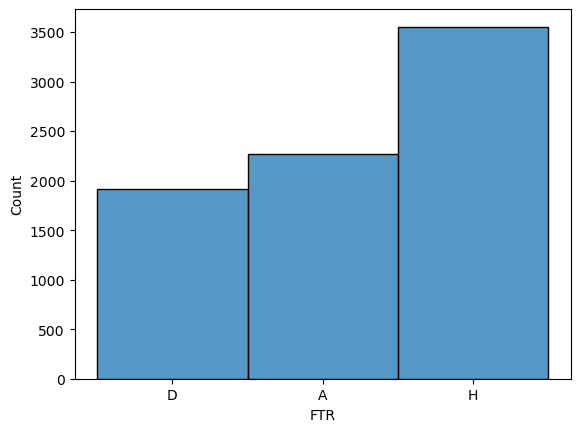

In [16]:
sns.histplot(df_epl, x='FTR')
plt.show()

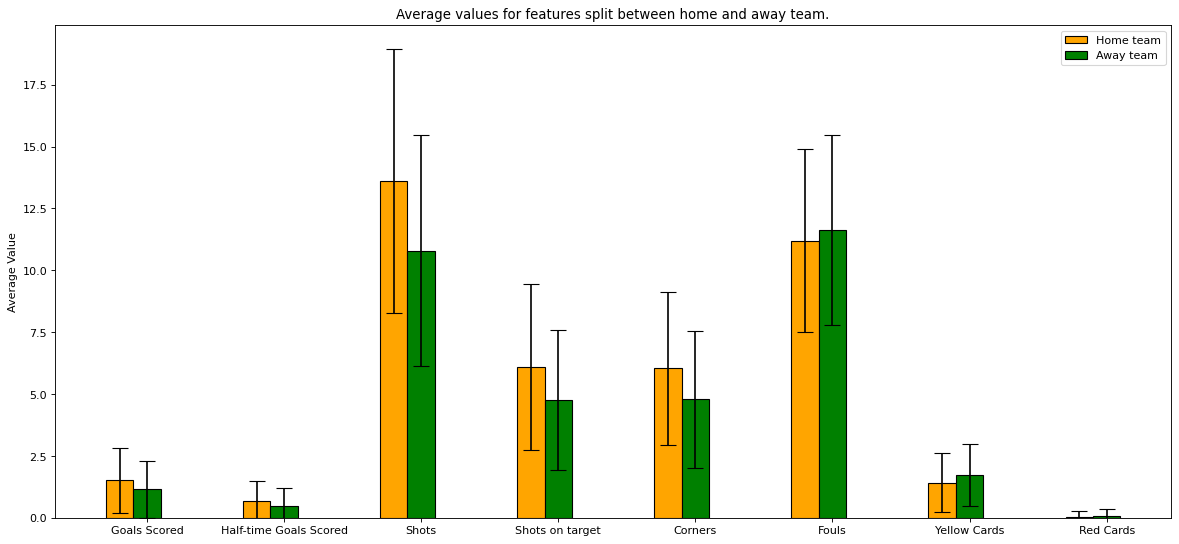

In [17]:
describe_df = df_epl.describe()
# Graph inspired by https://armantee.github.io/predicting/

home_features = ['FTHG','HTHG','HS','HST','HC','HF','HY','HR']
away_features = ['FTAG','HTAG','AS','AST','AC','AF','AY','AR']
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')

# width of the bars
barWidth = 0.2
bars1 = np.array(describe_df.iloc[1, :][home_features]).flatten()
bars2 = np.array(describe_df.iloc[1, :][away_features]).flatten()
yer1 = np.array(describe_df.iloc[2, :][home_features]).flatten()
yer2 = np.array(describe_df.iloc[2, :][away_features]).flatten()
# The x position of bars
r1 = np.arange(len(bars1.flatten()))
r2 = [x + barWidth for x in r1]
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yer1, capsize=7, label='Home team')
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label='Away team')
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Goals Scored', 'Half-time Goals Scored', 'Shots','Shots on target', 'Corners','Fouls','Yellow Cards','Red Cards'])
plt.ylabel('Average Value')
plt.ylim(0)
plt.title("Average values for features split between home and away team.")
plt.legend()
# Show graphic
plt.show()

Although most of standard deviation errors overlap greatly, the home advantage is clearly visible. This needs to be taken into account while working on classifiers. Shots and Shots on target may be especially great indicators for the result. Let's verify this and explore the correlation matrix for the existing features.

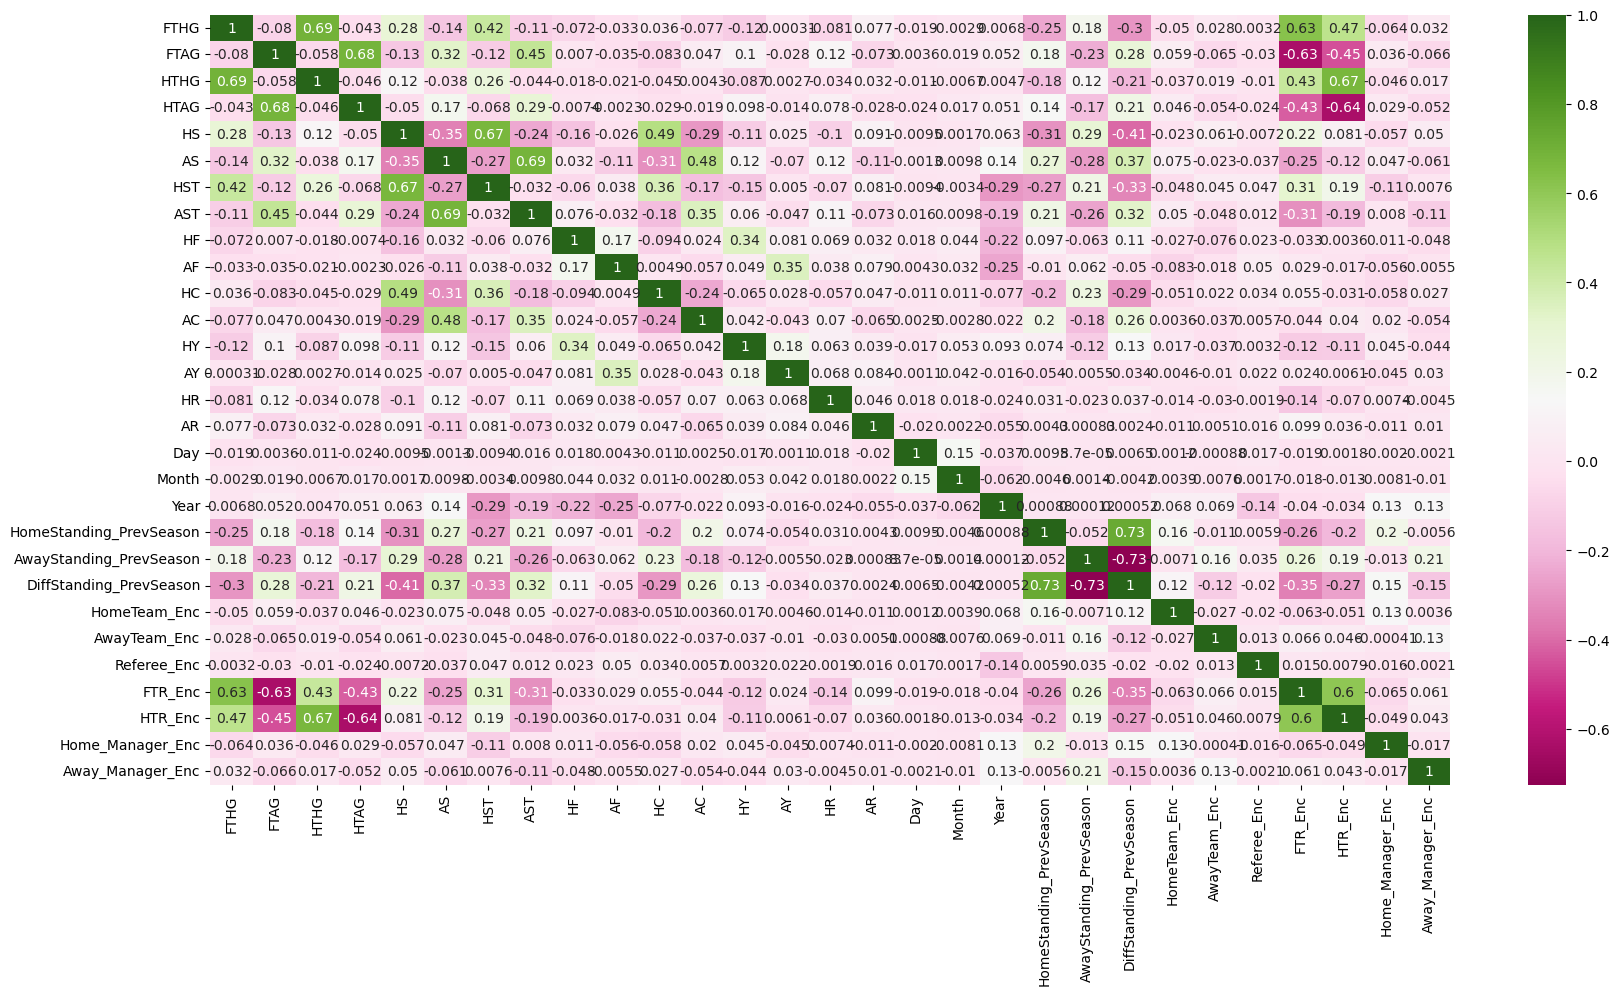

In [18]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_epl.corr(numeric_only="False"), cmap="PiYG", annot= True)
plt.show()

In [19]:
year_dict = []
for i in range(2002, 2023):
    grouped_wins = df_epl[(df_epl['FTR'] == 'H') & (df_epl['Year'] == i)].groupby('HomeTeam')
    grouped_all = df_epl[(df_epl['Year'] == i)].groupby('HomeTeam')
    
    year_dict.append(dict(grouped_wins['FTR'].count()/grouped_all['FTR'].count()))

def get_team_stats(team_name):
    team = []
    for year in range(len(year_dict)):
        try:
            value = year_dict[year][team_name]
            if np.isnan(value):
                value = 0
        except KeyError:
            value = 0
        team.append(value)
    return team

[]

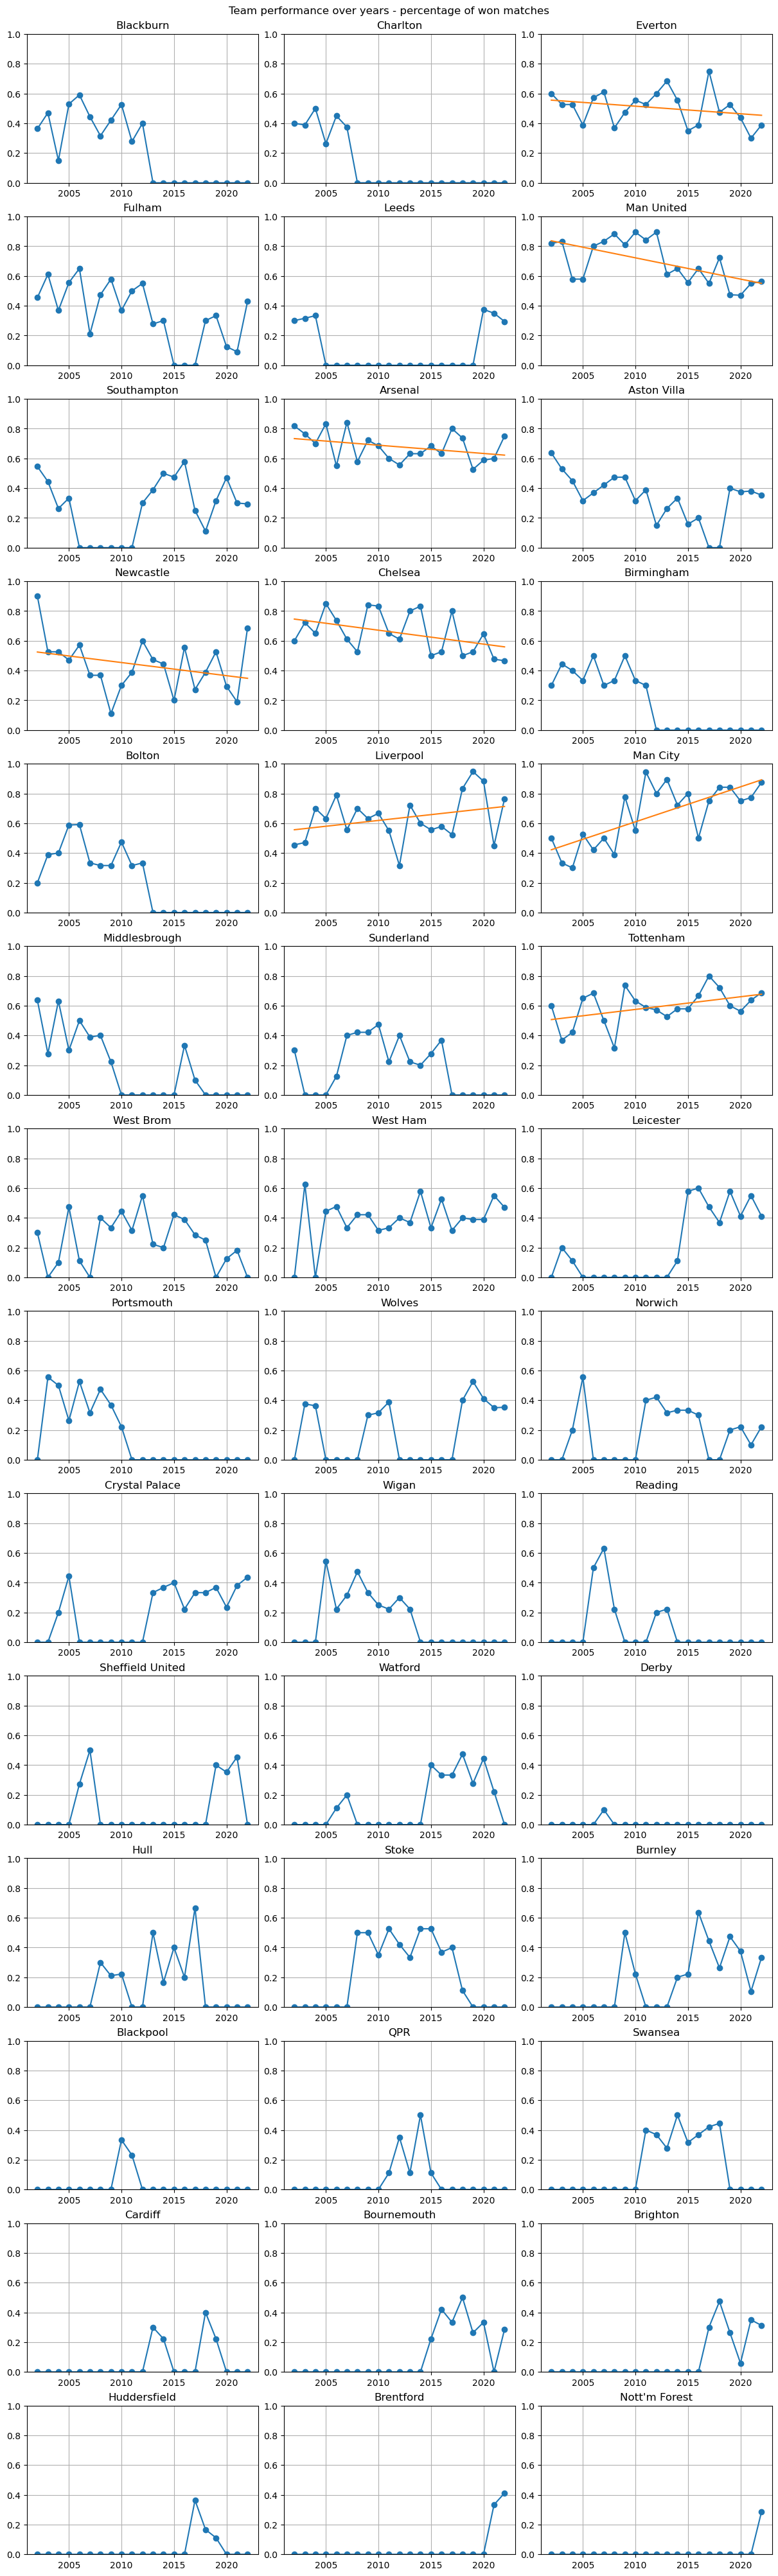

In [20]:
fig, ax = plt.subplots(14, 3, figsize=(12, 40), constrained_layout=True)

for i, team_name in enumerate(df_epl['HomeTeam'].unique()):
    ax[i//3][i%3].set_title(team_name)
    ax[i//3][i%3].grid()
    # ax[i//3][i%3].set_xticks(np.arange(2002, 2023, step=1))
    ax[i//3][i%3].set_ylim(ymin=0)
    y = get_team_stats(team_name)
    x = np.array((range(2002, 2023)))
    ax[i//3][i%3].plot(x, y, '-o')
    if 0 not in set(y):
        a, b = np.polyfit(x, y, 1)
        ax[i//3][i%3].plot(x, a*x+b)
fig.suptitle("Team performance over years - percentage of won matches")
plt.plot()

It's worth noting that most of the teams did not play for the full 20 past years. This is likely caused by league promotions and relegations. 

Let's see if a time of a year has an influence on a match outcome.

In [21]:
counts = {}
month_names = {}
for month in range(1, 13):
    h = 100 * len(df_epl[(df_epl['Month'] == month) & (df_epl['FTR'] == 'H')])/len(df_epl[(df_epl['Month'] == month)])
    d = 100 * len(df_epl[(df_epl['Month'] == month) & (df_epl['FTR'] == 'D')])/len(df_epl[(df_epl['Month'] == month)])
    a = 100 * len(df_epl[(df_epl['Month'] == month) & (df_epl['FTR'] == 'A')])/len(df_epl[(df_epl['Month'] == month)])
    counts[month_name[month]] = [h, a, d]

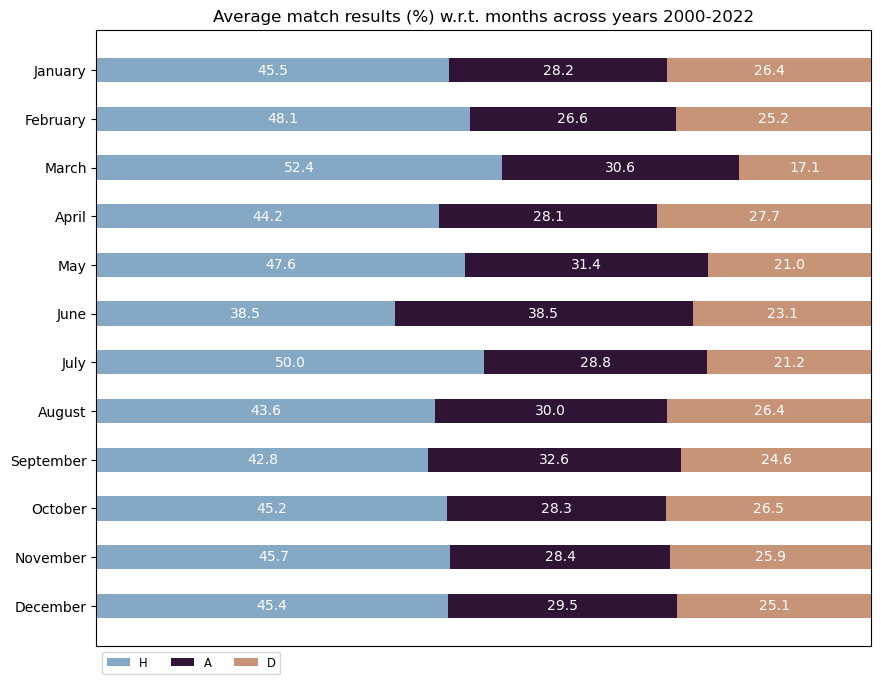

In [22]:
# inspired by https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

category_names = ['H', 'A', 'D']
results = counts

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['twilight'](
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(10, 8))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', fmt='%.1f', color=text_color)
    
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 0),
            loc='upper left', fontsize='small')
plt.title("Average match results (%) w.r.t. months across years 2000-2022")
plt.show()

<AxesSubplot: xlabel='Month', ylabel='Count'>

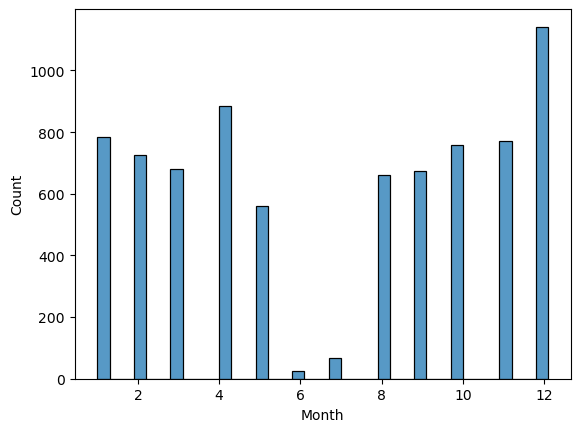

In [23]:
sns.histplot(data=df_epl, x='Month', binwidth=0.3)

In general, it looks like results across months are the similar, apart from June/July and March. This may be the outcome of much less matches being played during those months. Let's investigate this.

Now, let's see how the number of matches won by a team changes across years.

### <a id='toc3_2_2_'></a>[Analyse Team Rankings across the years](#toc0_)

Text(0.5, 0.98, 'Team performance over years - rankings at the end of each season')

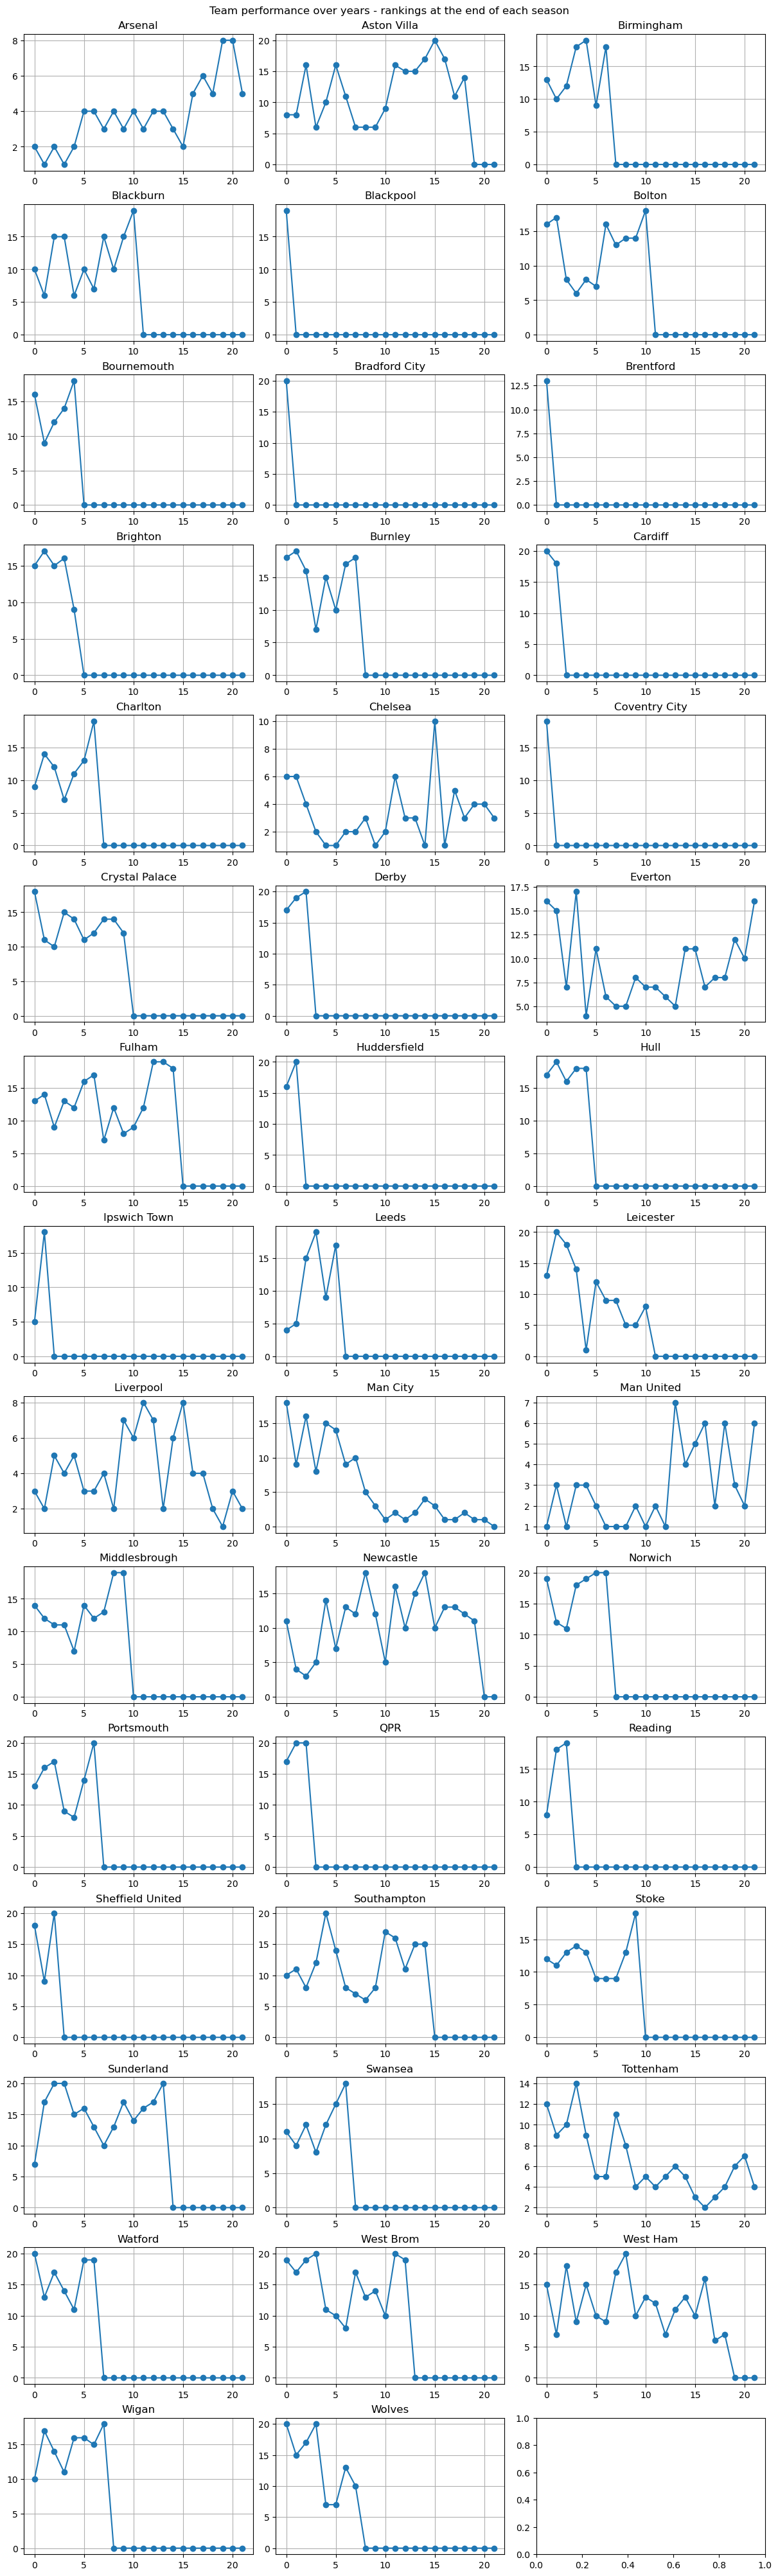

In [24]:
team_standings = []

def get_unique_entries(df_ranking, col):
    temp = list(df_ranking[col])
    result = list(set(temp))
    return result

seasons = sorted(get_unique_entries(df_ranking, 'Season'))
teams = sorted(get_unique_entries(df_ranking, 'Team'))

def get_team_standings(team, df_ranking):
    team_standing = {}
    rows = df_ranking.loc[df_ranking['Team'] == team]
    for index, row in rows.iterrows():
        team_standing[row['Season']] = int(row['Pos'])
    for season in seasons:
        if season not in team_standing.keys():
            team_standing[season] = 0
    return team_standing

for team in teams:
    team_standings.append(get_team_standings(team, df_ranking))

fig, ax = plt.subplots(len(teams)//3+1, 3, figsize=(12, 40), constrained_layout=True)

for i in range(len(teams)):
    ax[i//3][i%3].set_title(teams[i])
    ax[i//3][i%3].grid()
#     ax[i//3][i%3].set_ylim(ymin=0)
    y = np.array(list(team_standings[i].values()))
    x = np.array(list(range(0, len(list(team_standings[i].values())))))
    ax[i//3][i%3].plot(x, y, '-o')

fig.suptitle("Team performance over years - rankings at the end of each season")

### <a id='toc3_2_3_'></a>[Analysing a Team Manager Performance Across The 5 Most Recent Seasons](#toc0_)

In [25]:
def calculate_manager_points(teams, df_season):
    for index, row in df_season.iterrows():
        Date, HomeTeam, AwayTeam, FTR, Home_Manager, Away_Manager = row
        if HomeTeam not in teams.keys():
            teams[HomeTeam] = {}
        if AwayTeam not in teams.keys():  
            teams[AwayTeam] = {}

    for index, row in df_season.iterrows():
        Date, HomeTeam, AwayTeam, FTR, Home_Manager, Away_Manager = row
        if Home_Manager not in teams[HomeTeam].keys():
            teams[HomeTeam][Home_Manager] = result_points(FTR, 'Home')
        else:
            teams[HomeTeam][Home_Manager] = teams[HomeTeam][Home_Manager] + result_points(FTR, 'Home')

        if Away_Manager not in teams[AwayTeam].keys():  
            teams[AwayTeam][Away_Manager] = result_points(FTR, 'Away')
        else:
            teams[AwayTeam][Away_Manager] = teams[AwayTeam][Away_Manager] + result_points(FTR, 'Away')
    return teams

# Filter the dataframe to include only rows where Date , eg 2017-2018
start_years = ['2017', '2018', '2019' , '2020', '2021']
end_years = ['2018', '2019' , '2020', '2021', '2022']

season1718 = {}
season1819 = {}
season1920 = {}
season2021 = {}
season2122 = {}

seasons = [season1718, season1819,season1920,season2021,season2122]

home_point_system = {
    'H':3,
    'A':0,
    'D':1
}

away_point_system = {
    'H':0,
    'A':3,
    'D':1
}

def result_points(FTR, Team):
    if Team == 'Home':
        return home_point_system[FTR]
    else:
        return away_point_system[FTR]

def get_data_by_season(start_date, end_date, df_main):
    df_season = df_main.copy()
    df_season = df_season[(df_season.Date>=start_date) & (df_season.Date<=end_date)]
    df_season = df_season.drop(columns=['Div', 'FTHG', 'FTAG', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'Day', 'Month', 'Year',
       'HomeStanding_PrevSeason', 'AwayStanding_PrevSeason',
       'DiffStanding_PrevSeason',
       'HomeTeam_Enc', 'AwayTeam_Enc', 'Referee_Enc', 'FTR_Enc', 'HTR_Enc',
       'Home_Manager_Enc', 'Away_Manager_Enc'])
    return df_season

for i in range(len(start_years)):
    start_year = start_years[i]
    end_year = end_years[i]
    start_date = pd.to_datetime('01/08/' + start_year, dayfirst=True)  
    end_date = pd.to_datetime('01/08/'+ end_year, dayfirst=True) 
    df_season = get_data_by_season(start_date, end_date, df_epl)
    seasons[i] = calculate_manager_points(seasons[i], df_season)

df_teams_2017_2022 = get_data_by_season('01/08/2017', '01/08/2022', df_epl)

set_Home = set(df_teams_2017_2022['HomeTeam'])
set_Away = set(df_teams_2017_2022['AwayTeam'])
resultList= list(set_Home | set_Away)

In [26]:
plotData = {}

for team in resultList:
    scores = {}
    for i in range(len(seasons)):
        currentSeason = seasons[i]
        if team in currentSeason.keys(): 
            currentTeam = currentSeason[team]
            seasonKey = start_years[i]
            if seasonKey not in scores.keys():
                scores[seasonKey] = {}
                scores[seasonKey] = currentTeam
    plotData[team] = scores

In [27]:
df_list = []
df_names = []

for key, value in plotData.items():
    if bool(value):
        df_pre = pd.DataFrame(value)
        df = df_pre.fillna(0)
        df_list.append(df.to_dict())
        df_names.append(key)

/home/adamliu/anaconda3/envs/COMP0036_test/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 154 (\x9a) missing from current font.
  func(*args, **kwargs)
/home/adamliu/anaconda3/envs/COMP0036_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


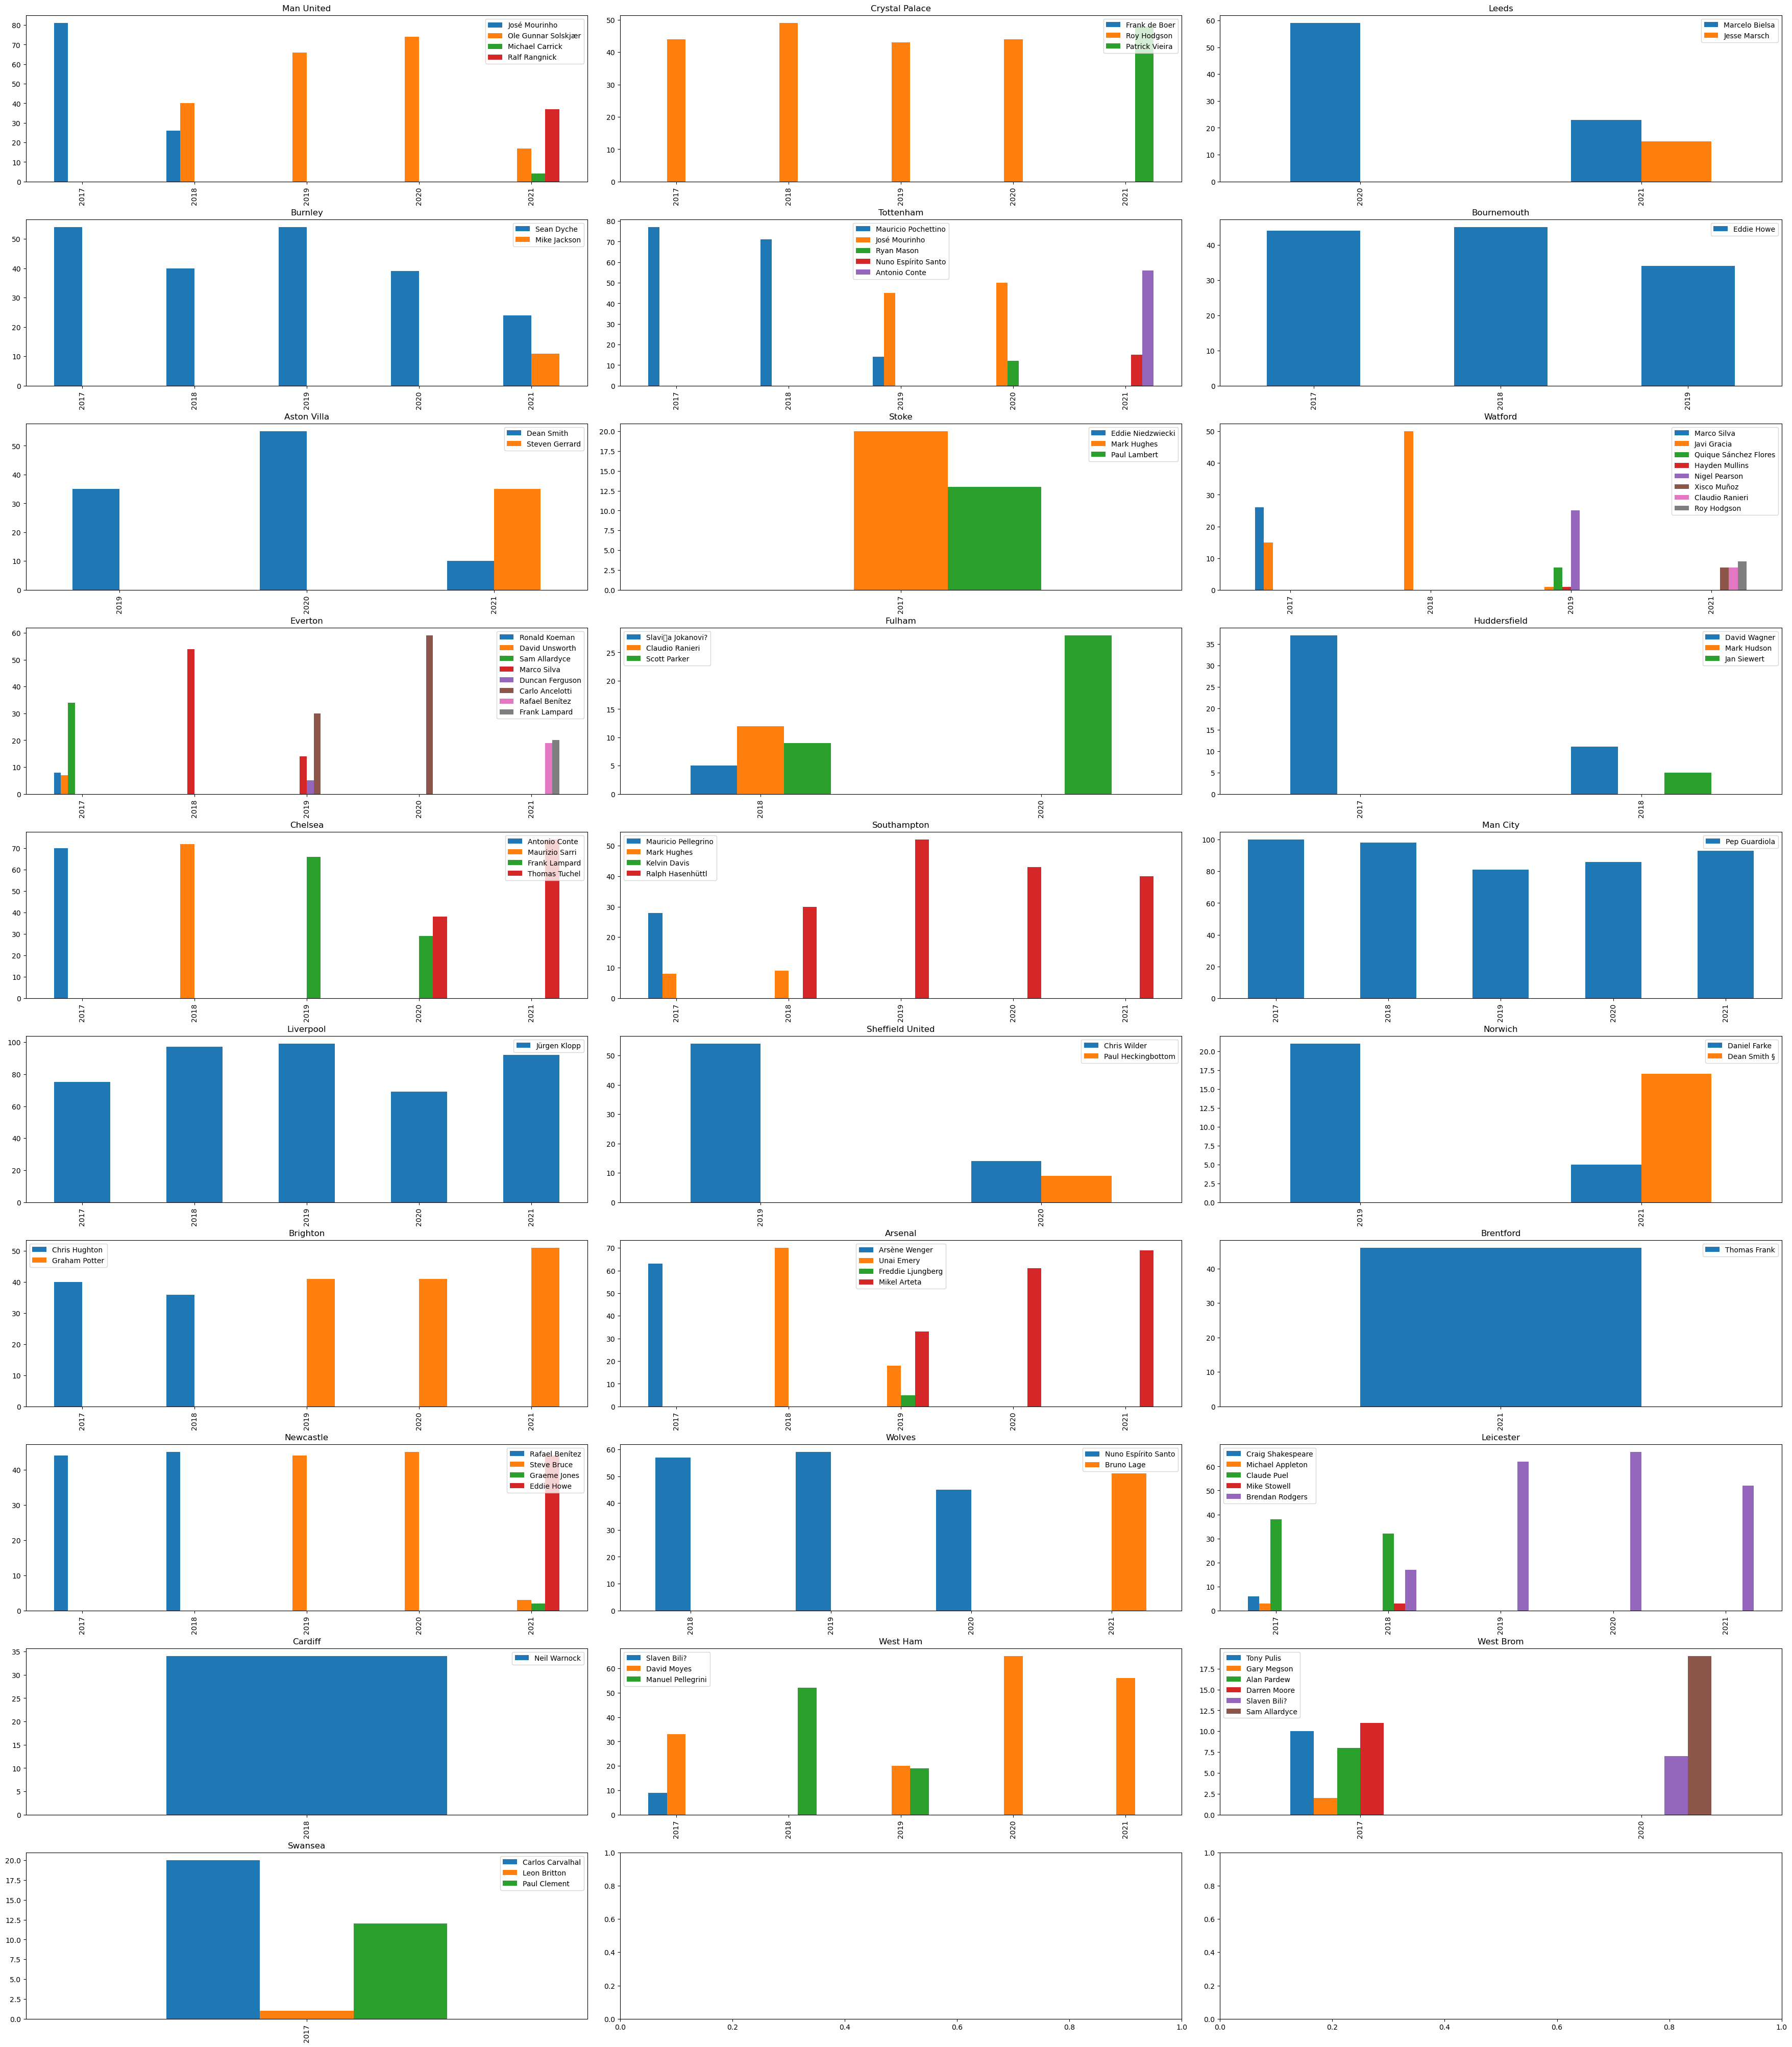

In [28]:
fig, axes = plt.subplots(len(df_names)//3 + 1, 3, figsize=(35, 40), constrained_layout=True)
for i in range(len(df_names)):
        plotData = pd.DataFrame(df_list[i])
        plotData.transpose().plot.bar(ax=axes[i//3,i%3], title=df_names[i])

# <a id='toc4_'></a>[Feature Engineering](#toc0_)

In [29]:
# Transform the date column into day and month columns and Add into dataframe (Extract days & months from date)
df_epl["Day"] = df_epl["Date"].dt.day
df_epl["Month"] = df_epl["Date"].dt.month 
df_epl["Year"] = df_epl["Date"].dt.year

# Turn the catergorical data into labels
df_epl["HomeTeam_Enc"] = df_epl["HomeTeam"].astype("category").cat.codes
df_epl["AwayTeam_Enc"] = df_epl["AwayTeam"].astype("category").cat.codes
df_epl["Referee_Enc"] = df_epl["Referee"].astype("category").cat.codes

FTR_encoder = LabelEncoder()
FTR_Enc = FTR_encoder.fit_transform(df_epl["FTR"])
df_epl["FTR_Enc"] = FTR_Enc
HTR_Enc = FTR_encoder.fit_transform(df_epl["HTR"])
df_epl["HTR_Enc"] = HTR_Enc

df_epl["Home_Manager_Enc"] = df_epl["Home_Manager"].astype("category").cat.codes
df_epl["Away_Manager_Enc"] = df_epl["Away_Manager"].astype("category").cat.codes

### <a id='toc4_1_1_'></a>[Adding Average Past Match Statistics & Past Season % Number Of Wins](#toc0_)

_HISTORY -> We add averages of past stats between the specific two teams in question. We obtain these stats (for each row of df_epl) by filtering the df_epl dataframe for matches ONLY between HomeTeam and AwayTeam that took place before the match date. Then take an average of the columns (with stats) like HR, AR, etc (of filtered dataframe). This happens for each row. This will provide us with the average past stats for games played in the past between the specific two teams.

_AVG -> We add averages of past stats between the for each of two teams in question. We obtain these stats (for each row of df_epl) by filtering the df_epl dataframe for matches between HomeTeam against ALL other teams that took place before the match date in that current season. Similar is done for the AwayTeam. Then take an average of the columns (with stats) like HR, AR, etc (of the filtered dataframe). This process happens for each row. This will provide us with the average past stats for the all HomeTeam games in that season and all AwayTeam games in that season.

HW_AVG & AW_AVG -> The number of past wins are calculated by summing the number of wins by the team in the season.

In [30]:
# PART 1 - THESE ARE HELPER FUNCTIONS WE NEED:

def get_season_start_date(date):
    if date.month <= 7:
        return datetime(date.year-1, 8, 1)
    return datetime(date.year-0, 8, 1)

def filter_dataframe_by_hometeam_history(df, date, HomeTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Date
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.HomeTeam_Enc==HomeTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_awayteam_history(df, date, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Date
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.AwayTeam_Enc==AwayTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_hometeam_recent_season(df, date, HomeTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Dateinput(first day of season) && HomeTeam=input(HomeTeam)
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.Date>get_season_start_date(date)) & (df_filtered.HomeTeam_Enc==HomeTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_awayteam_recent_season(df, date, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Dateinput(first day of season) && HomeTeam=input(HomeTeam)
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.Date>get_season_start_date(date)) & (df_filtered.AwayTeam_Enc==AwayTeam)]

    # Return filtered dataframe
    return df_filtered

# This function takes as input the filtered dataframe from previous cell, features to average and a dictionary,it then appends an average of each feature to the dictionary
def average_columns(avg_features, filtered_df):
    for feature in avg_features.keys():
        df_col_means = filtered_df[feature].mean()
        avg_features[feature].append(df_col_means)
        
# This function takes as input a filtered dataframe from previous cell, and a list, it then appends the % number of home/away wins in past
def find_number_of_wins(number_of_wins_list, filtered_df, team):
    df_filtered_ftr = filtered_df.copy()
    total_games = df_filtered_ftr.shape[0]
    if total_games == 0:
        number_of_wins_list.append(np.nan)
        return
    number_of_wins = df_filtered_ftr[(df_filtered_ftr.FTR==team)].shape[0]
    number_of_wins_list.append(number_of_wins/total_games)

        
# PART 2 - CREATE FEATURES & ADDING THEM TO DATAFRAME:

# These are the features we want to get averages for home team
avg_features_home_hist = {
                  "FTHG": [],
                  "HTHG": [],
                  "HS"  : [],
                  "HST" : [],
                  "HF"  : [],
                  "HC"  : [],
                  "HY"  : [],
                  "HR"  : []
              }

# These are the features we want to get averages for away team
avg_features_away_hist = {
                  "FTAG": [],
                  "HTAG": [],
                  "AS"  : [],
                  "AST" : [],
                  "AF"  : [],
                  "AC"  : [],
                  "AY"  : [],
                  "AR"  : []
                }

# These are the features we want to get averages for home team
avg_features_home_recent = {
                  "FTHG": [],
                  "HTHG": [],
                  "HS"  : [],
                  "HST" : [],
                  "HF"  : [],
                  "HC"  : [],
                  "HY"  : [],
                  "HR"  : []
              }

# These are the features we want to get averages for away team
avg_features_away_recent = {
                  "FTAG": [],
                  "HTAG": [],
                  "AS"  : [],
                  "AST" : [],
                  "AF"  : [],
                  "AC"  : [],
                  "AY"  : [],
                  "AR"  : []
                }

number_of_wins_HOME = []
number_of_wins_AWAY = []


# Run the two functions on each row of the df_epl and fill the dictionary
for index, row in df_epl.iterrows():
    # Filter the dataframe to only show matches played between those teams and before the certain date
    df_epl_train_average_hometeam_history = filter_dataframe_by_hometeam_history(df_epl, row["Date"],row["HomeTeam_Enc"])
    df_epl_train_average_awayteam_history = filter_dataframe_by_awayteam_history(df_epl, row["Date"],row["HomeTeam_Enc"])
    df_epl_train_average_hometeam_recent_season = filter_dataframe_by_hometeam_recent_season(df_epl, row["Date"],row["HomeTeam_Enc"])
    df_epl_train_average_awayteam_recent_season = filter_dataframe_by_awayteam_recent_season(df_epl, row["Date"],row["AwayTeam_Enc"])
    # Get averages from the filtered dataframe and add to the dictionary
    average_columns(avg_features_home_hist, df_epl_train_average_hometeam_history)
    average_columns(avg_features_away_hist, df_epl_train_average_awayteam_history)
    average_columns(avg_features_home_recent, df_epl_train_average_hometeam_recent_season)
    average_columns(avg_features_away_recent, df_epl_train_average_awayteam_recent_season)
    # Get number_of_wins from the filtered dataframe and add to list
    find_number_of_wins(number_of_wins_HOME, df_epl_train_average_hometeam_recent_season, "H")
    find_number_of_wins(number_of_wins_AWAY, df_epl_train_average_awayteam_recent_season, "A")

    
# Add features to dataframe
for feature in avg_features_home_hist.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_home_hist[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_HISTORY"] = feature_vals



# Add features to dataframe
for feature in avg_features_away_hist.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_away_hist[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_HISTORY"] = feature_vals


for feature in avg_features_home_recent.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_home_recent[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_AVG"] = feature_vals


for feature in avg_features_away_recent.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_away_recent[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_AVG"] = feature_vals
    
# Add the past % number of wins
df_epl["HW_AVG"] = number_of_wins_HOME
df_epl["AW_AVG"] = number_of_wins_AWAY


# Drop any rows with nan
df_epl = df_epl.dropna()
df_epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,FTAG_AVG,HTAG_AVG,AS_AVG,AST_AVG,AF_AVG,AC_AVG,AY_AVG,AR_AVG,HW_AVG,AW_AVG
20,E0,2002-08-27,Arsenal,West Brom,5,2,H,3,0,H,...,0.000000,0.000000,6.000000,5.000000,12.000000,1.000000,1.000000,1.0,1.000000,0.000000
21,E0,2002-08-27,Charlton,Tottenham,0,1,A,0,1,A,...,2.000000,0.000000,10.000000,5.000000,4.000000,5.000000,1.000000,0.0,0.000000,0.000000
22,E0,2002-08-28,Aston Villa,Man City,1,0,H,0,0,D,...,0.000000,0.000000,18.000000,10.000000,13.000000,7.000000,1.000000,0.0,0.000000,0.000000
23,E0,2002-08-28,Blackburn,Liverpool,2,2,D,1,1,D,...,1.000000,0.000000,12.000000,6.000000,5.000000,8.000000,2.000000,0.0,0.000000,1.000000
24,E0,2002-08-28,Everton,Birmingham,1,1,D,0,0,D,...,0.000000,0.000000,7.000000,1.000000,11.000000,2.000000,1.000000,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,2022-11-06,Chelsea,Arsenal,0,1,A,0,0,D,...,1.833333,1.166667,12.333333,4.166667,9.833333,4.000000,1.833333,0.0,0.600000,0.666667
7732,E0,2022-11-06,Aston Villa,Man United,3,1,H,2,1,H,...,1.333333,0.500000,12.000000,5.000000,12.666667,2.833333,3.000000,0.0,0.500000,0.500000
7733,E0,2022-11-06,Southampton,Newcastle,1,4,A,0,1,A,...,1.333333,1.000000,11.833333,4.333333,9.000000,5.833333,1.500000,0.0,0.166667,0.333333
7734,E0,2022-11-06,West Ham,Crystal Palace,1,2,A,1,1,D,...,0.600000,0.600000,9.000000,3.400000,11.000000,2.800000,2.600000,0.0,0.500000,0.000000


In [31]:
# PART 1 - THESE ARE HELPER FUNCTIONS WE NEED:

def get_season_start_date(date):
    if date.month <= 7:
        return datetime(date.year-1, 8, 1)
    return datetime(date.year-0, 8, 1)

def filter_dataframe_by_hometeam_history(df, date, HomeTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Date
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.HomeTeam_Enc==HomeTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_awayteam_history(df, date, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Date
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.AwayTeam_Enc==AwayTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_hometeam_recent_season(df, date, HomeTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Dateinput(first day of season) && HomeTeam=input(HomeTeam)
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.Date>get_season_start_date(date)) & (df_filtered.HomeTeam_Enc==HomeTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_awayteam_recent_season(df, date, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Dateinput(first day of season) && HomeTeam=input(HomeTeam)
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.Date>get_season_start_date(date)) & (df_filtered.AwayTeam_Enc==AwayTeam)]

    # Return filtered dataframe
    return df_filtered

# This function takes as input the filtered dataframe from previous cell, features to average and a dictionary,it then appends an average of each feature to the dictionary
def average_columns(avg_features, filtered_df):
    for feature in avg_features.keys():
        df_col_means = filtered_df[feature].mean()
        avg_features[feature].append(df_col_means)
        
# This function takes as input a filtered dataframe from previous cell, and a list, it then appends the % number of home/away wins in past
def find_number_of_wins(number_of_wins_list, filtered_df, team):
    df_filtered_ftr = filtered_df.copy()
    total_games = df_filtered_ftr.shape[0]
    if total_games == 0:
        number_of_wins_list.append(np.nan)
        return
    number_of_wins = df_filtered_ftr[(df_filtered_ftr.FTR==team)].shape[0]
    number_of_wins_list.append(number_of_wins/total_games)

        
# PART 2 - CREATE FEATURES & ADDING THEM TO DATAFRAME:

# These are the features we want to get averages for home team
avg_features_home_hist = {
                  "FTHG": [],
                  "HTHG": [],
                  "HS"  : [],
                  "HST" : [],
                  "HF"  : [],
                  "HC"  : [],
                  "HY"  : [],
                  "HR"  : []
              }

# These are the features we want to get averages for away team
avg_features_away_hist = {
                  "FTAG": [],
                  "HTAG": [],
                  "AS"  : [],
                  "AST" : [],
                  "AF"  : [],
                  "AC"  : [],
                  "AY"  : [],
                  "AR"  : []
                }

# These are the features we want to get averages for home team
avg_features_home_recent = {
                  "FTHG": [],
                  "HTHG": [],
                  "HS"  : [],
                  "HST" : [],
                  "HF"  : [],
                  "HC"  : [],
                  "HY"  : [],
                  "HR"  : []
              }

# These are the features we want to get averages for away team
avg_features_away_recent = {
                  "FTAG": [],
                  "HTAG": [],
                  "AS"  : [],
                  "AST" : [],
                  "AF"  : [],
                  "AC"  : [],
                  "AY"  : [],
                  "AR"  : []
                }

number_of_wins_HOME = []
number_of_wins_AWAY = []


# Run the two functions on each row of the df_epl and fill the dictionary
for index, row in df_epl.iterrows():
    # Filter the dataframe to only show matches played between those teams and before the certain date
    df_epl_train_average_hometeam_history = filter_dataframe_by_hometeam_history(df_epl, row["Date"],row["HomeTeam_Enc"])
    df_epl_train_average_awayteam_history = filter_dataframe_by_awayteam_history(df_epl, row["Date"],row["HomeTeam_Enc"])
    df_epl_train_average_hometeam_recent_season = filter_dataframe_by_hometeam_recent_season(df_epl, row["Date"],row["HomeTeam_Enc"])
    df_epl_train_average_awayteam_recent_season = filter_dataframe_by_awayteam_recent_season(df_epl, row["Date"],row["AwayTeam_Enc"])
    # Get averages from the filtered dataframe and add to the dictionary
    average_columns(avg_features_home_hist, df_epl_train_average_hometeam_history)
    average_columns(avg_features_away_hist, df_epl_train_average_awayteam_history)
    average_columns(avg_features_home_recent, df_epl_train_average_hometeam_recent_season)
    average_columns(avg_features_away_recent, df_epl_train_average_awayteam_recent_season)
    # Get number_of_wins from the filtered dataframe and add to list
    find_number_of_wins(number_of_wins_HOME, df_epl_train_average_hometeam_recent_season, "H")
    find_number_of_wins(number_of_wins_AWAY, df_epl_train_average_awayteam_recent_season, "A")

    
# Add features to dataframe
for feature in avg_features_home_hist.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_home_hist[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_HISTORY"] = feature_vals


# Add features to dataframe
for feature in avg_features_away_hist.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_away_hist[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_HISTORY"] = feature_vals


for feature in avg_features_home_recent.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_home_recent[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_AVG"] = feature_vals


for feature in avg_features_away_recent.keys():
    # Get the list of averages for a certain feature from the dicitonary
    feature_vals = avg_features_away_recent[feature]
    # Add the list of averages into the dataframe for that certain feature
    df_epl.loc[:,feature + "_AVG"] = feature_vals
    
# Add the past % number of wins
df_epl["HW_AVG"] = number_of_wins_HOME
df_epl["AW_AVG"] = number_of_wins_AWAY


# Drop any rows with nan
df_epl = df_epl.dropna()
df_epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,FTAG_AVG,HTAG_AVG,AS_AVG,AST_AVG,AF_AVG,AC_AVG,AY_AVG,AR_AVG,HW_AVG,AW_AVG
38,E0,2002-09-10,Arsenal,Man City,2,1,H,2,1,H,...,0.00,0.00,7.00,1.00,11.00,4.00,3.00,0.0,1.00,0.0
39,E0,2002-09-10,Middlesbrough,Sunderland,3,0,H,2,0,H,...,1.00,0.00,9.00,4.00,11.00,1.00,0.00,0.0,1.00,1.0
40,E0,2002-09-11,Aston Villa,Charlton,2,0,H,0,0,D,...,2.00,2.00,5.00,3.00,15.00,6.00,1.00,0.0,1.00,1.0
41,E0,2002-09-11,Blackburn,Chelsea,2,3,A,2,1,H,...,1.00,0.00,10.00,3.00,11.00,6.00,1.00,0.0,0.00,0.0
43,E0,2002-09-11,Liverpool,Birmingham,2,2,D,1,0,H,...,1.00,0.00,5.00,2.00,12.00,4.00,3.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,2022-11-06,Chelsea,Arsenal,0,1,A,0,0,D,...,1.80,1.20,12.80,4.60,9.60,3.80,1.80,0.0,0.75,0.6
7732,E0,2022-11-06,Aston Villa,Man United,3,1,H,2,1,H,...,1.60,0.60,11.40,5.20,12.20,3.00,2.80,0.0,0.40,0.6
7733,E0,2022-11-06,Southampton,Newcastle,1,4,A,0,1,A,...,1.60,1.20,13.40,5.00,9.60,6.40,1.20,0.0,0.20,0.4
7734,E0,2022-11-06,West Ham,Crystal Palace,1,2,A,1,1,D,...,0.50,0.50,9.50,3.50,11.75,3.00,2.25,0.0,0.60,0.0


### <a id='toc4_1_2_'></a>[Adding Expected Goals](#toc0_)

The expected goals for each team are calculated using a polynomial regression classifier that is trained using  some of the average past statistics. Then for each row of df_epl, we predict the expected goals for HomeTeam and AwayTeam using the classifier.

In [32]:
# PART 1 - CREATE EXPECTED GOALS REGRESSION MODEL:

# Here we aim to create a 'expected or predicted goals for a HomeTeam' feature based upon past average stats
min_mse_home = float('inf')
min_mse_away = float('inf')

# Create the design matrix
X_H = df_epl.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'FTHG_AVG', 'HTHG_AVG', 'HS_AVG']].values
y_H = df_epl.loc[:,'FTHG'].values
X_H_train, X_H_test, y_H_train, y_H_test = model_selection.train_test_split(X_H, y_H, test_size=0.2, shuffle=False)

# Similar idea for AwayTeam
X_A = df_epl.loc[:,['Day', 'Month', 'AwayTeam_Enc', 'FTAG_AVG', 'HTAG_AVG', 'AS_AVG']].values
y_A = df_epl.loc[:,'FTAG'].values
X_A_train, X_A_test, y_A_train, y_A_test = model_selection.train_test_split(X_A, y_A, test_size=0.2, shuffle=False)

# Here we use a polynomial regression classifier - and select best order:
for i in range(1,5):
    # Select order
    poly = PolynomialFeatures(degree=i)

    # Transform the features
    X_H_train_transform = poly.fit_transform(X_H_train)
    X_H_test_transform = poly.fit_transform(X_H_test)

    LR_Model_HOME_EG = LinearRegression()
    # Fit the model using training data
    LR_Model_HOME_EG.fit(X_H_train_transform, y_H_train)
    # Make predictions using the model we have created
    LR_H_predictions_test = LR_Model_HOME_EG.predict(X_H_test_transform)
#     # Check the mean square error(MSE) for HomeTeam Expected Goals
#     print(i, mean_squared_error(LR_H_predictions_test, y_H_test))

    # Transform the features
    X_A_train_transform = poly.fit_transform(X_A_train)
    X_A_test_transform = poly.fit_transform(X_A_test)

    LR_Model_AWAY_EG = LinearRegression()
    # Fit the model using training data
    LR_Model_AWAY_EG.fit(X_A_train_transform, y_A_train)
    # Make predictions using the model we have created
    LR_A_predictions_test = LR_Model_AWAY_EG.predict(X_A_test_transform)
#     # Check the mean square error(MSE) for AwayTeam Expected Goals
#     print(i, mean_squared_error(LR_A_predictions_test, y_A_test))

    curr_mse_home = mean_squared_error(LR_H_predictions_test, y_H_test)
    curr_mse_away = mean_squared_error(LR_A_predictions_test, y_A_test)

    if curr_mse_home < min_mse_home:
        best_poly1 = poly
        best_model_home = LR_Model_HOME_EG
        min_mse_home = curr_mse_home

    if curr_mse_away < min_mse_away:
        best_poly2 = poly
        best_model_away = LR_Model_AWAY_EG
        min_mse_away = curr_mse_away
        
        
# PART 2 - ADD EXPECTED GOALS:

# Using the two regression classfiers above, predict the number of goals that the Home and Away teams will score for each row in the dataframe:
HomeExGoals = []
AwayExGoals = []

# For each row, predict the home and away expected goals
for index, row in df_epl.iterrows():
    X_Home_features = np.array([[row["Day"],row["Month"],row["HomeTeam_Enc"],row["FTHG_AVG"],row["HTHG_AVG"],row["HS_AVG"]]])
    X_Away_features = np.array([[row["Day"],row["Month"],row["AwayTeam_Enc"],row["FTAG_AVG"],row["HTAG_AVG"],row["AS_AVG"]]])
    # Transform features since we use polynomial regression
    X_Home_features_transform = best_poly1.fit_transform(X_Home_features)
    X_Away_features_transform = best_poly2.fit_transform(X_Away_features)
    # Use the best polynomial classifier - Note the prediction is a 1 by 1 vector
    ex_home_goals = best_model_home.predict(X_Home_features_transform)[0]
    ex_away_goals = best_model_away.predict(X_Away_features_transform)[0]
    # Add prediciton to list
    HomeExGoals.append(ex_home_goals)
    AwayExGoals.append(ex_away_goals)

# Add this data into the dataframe
df_epl["Ex_Goals_Home"] = HomeExGoals
df_epl["Ex_Goals_Away"] = AwayExGoals


# # Turn the catergorical data into labels using same method from before
# df_epl["AwayTeam_Enc"] = df_epl["AwayTeam"].astype("category").cat.codes
# df_epl["HomeTeam_Enc"] = df_epl["HomeTeam"].astype("category").cat.codes
# df_epl = df_epl.drop(['HomeTeam', 'AwayTeam', 'Div'], axis=1)
# # Transform the date column into day and month columns and Add into dataframe (Extract days & months from date)
# df_epl["Date"] = pd.to_datetime(df_epl["Date"])
# df_epl["Day"] = df_epl["Date"].dt.day
# df_epl["Month"] = df_epl["Date"].dt.month 
# df_epl["Year"] = df_epl["Date"].dt.year

### <a id='toc4_1_3_'></a>[Removing Pre-encoded Data](#toc0_)

In [33]:
# df_epl.drop(['FTR','HTR','Referee','Home_Manager','Away_Manager'],inplace=True,axis=1)
df_epl.drop(['HTR','Referee','Home_Manager','Away_Manager'],inplace=True,axis=1)

## <a id='toc4_2_'></a>[Breakdown of Features In The Dataframe/Dataset](#toc0_)

## <a id='toc4_3_'></a>[Final Dataframe containing all features](#toc0_)

In [34]:
df_epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,AS_AVG,AST_AVG,AF_AVG,AC_AVG,AY_AVG,AR_AVG,HW_AVG,AW_AVG,Ex_Goals_Home,Ex_Goals_Away
38,E0,2002-09-10,Arsenal,Man City,2,1,H,2,1,13,...,7.00,1.00,11.00,4.00,3.00,0.0,1.00,0.0,2.009827,0.730256
39,E0,2002-09-10,Middlesbrough,Sunderland,3,0,H,2,0,9,...,9.00,4.00,11.00,1.00,0.00,0.0,1.00,1.0,1.130674,0.953093
40,E0,2002-09-11,Aston Villa,Charlton,2,0,H,0,0,12,...,5.00,3.00,15.00,6.00,1.00,0.0,1.00,1.0,1.275731,0.856216
41,E0,2002-09-11,Blackburn,Chelsea,2,3,A,2,1,11,...,10.00,3.00,11.00,6.00,1.00,0.0,0.00,0.0,1.409954,1.124856
43,E0,2002-09-11,Liverpool,Birmingham,2,2,D,1,0,12,...,5.00,2.00,12.00,4.00,3.00,0.0,0.00,0.0,2.217943,0.846436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,2022-11-06,Chelsea,Arsenal,0,1,A,0,0,5,...,12.80,4.60,9.60,3.80,1.80,0.0,0.75,0.6,1.390364,1.424284
7732,E0,2022-11-06,Aston Villa,Man United,3,1,H,2,1,6,...,11.40,5.20,12.20,3.00,2.80,0.0,0.40,0.6,1.455428,1.221930
7733,E0,2022-11-06,Southampton,Newcastle,1,4,A,0,1,16,...,13.40,5.00,9.60,6.40,1.20,0.0,0.20,0.4,1.500799,1.313802
7734,E0,2022-11-06,West Ham,Crystal Palace,1,2,A,1,1,5,...,9.50,3.50,11.75,3.00,2.25,0.0,0.60,0.0,1.526100,0.985913


### <a id='toc4_3_1_'></a>[PLOT COOR MATRIX AGAIN (DEBUG)](#toc0_)

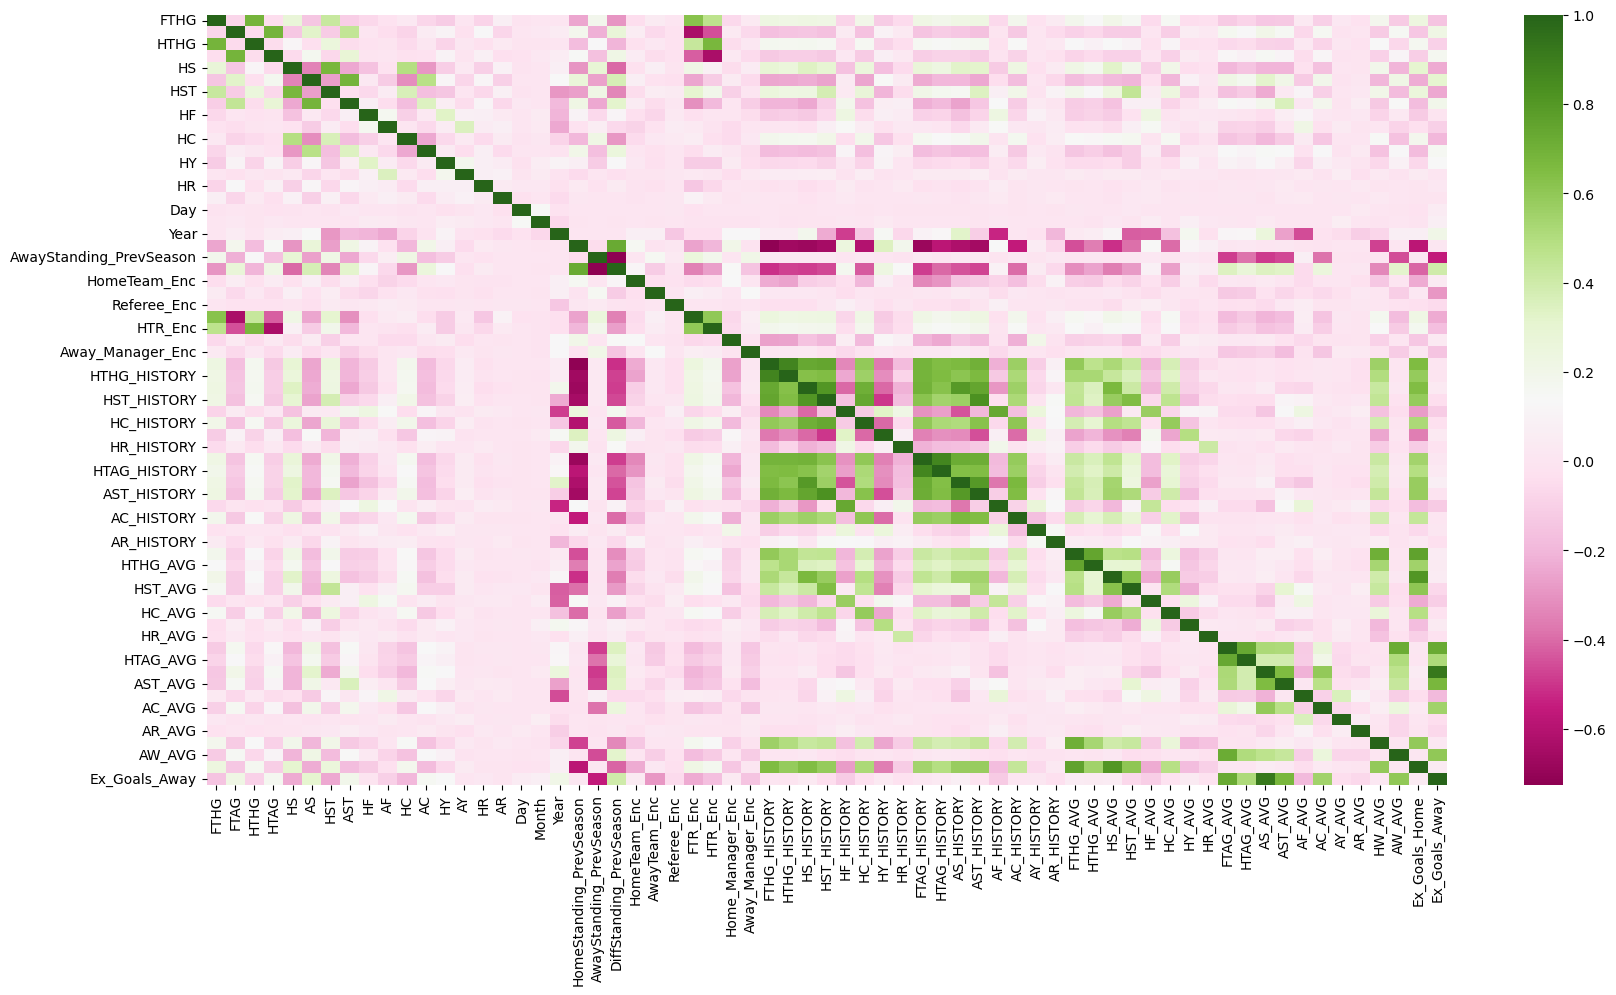

In [35]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_epl.corr(numeric_only="False"), cmap="PiYG", annot= False)
plt.show()

# <a id='toc5_'></a>[Auxiliary Functions + Classifier interfaces](#toc0_)

## <a id='toc5_1_'></a>[Evaluation helpers](#toc0_)

In [ ]:
def evaluate_report(y_pred, y_test):
  y_pred = y_pred.ravel()
  y_test = y_test.ravel()

  print("Balanced Accuracy: ", balanced_accuracy_score(y_test,y_pred))
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  # handle f1 score zero division
  # https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division
  print(classification_report(y_test, y_pred, zero_division=0))

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  plt.show()

In [ ]:
# Used for summary part of each feature Set
model_acc_dict = {
  'RG': 0,
  'DT': 0,
  'RF': 0,
  'KNN': 0,
  'SVM': 0,
  'XGB': 0,
  'NN': 0
}

compare_feature_sets_dict = {
  'Feature Set 1': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'Feature Set 2': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'Feature Set 3': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'Feature Set 4': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'Feature Set 5': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
}

## <a id='toc5_2_'></a>[Plotting helpers](#toc0_)

In [ ]:
def summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Feature Set 1", fig_size=(9, 9)):
  model_names = list(model_acc_dict.keys())
  '''
  model_names = ["Random Guess", "Decision Tree", 
                  "Random Forest", "K Nearest Neighbors",
                  "Support Vector Machine", "XGB",
                  "Nerual Network"]
  '''
  
  x_label = "Balanced Accuracy (%)"
  y_label = "Models trained"

  accs = model_acc_dict.values()

  fig = plt.figure(figsize=fig_size)
  ax = fig.gca()
  p1 = ax.barh(model_names, accs)

  ax.set_title(title, fontsize=12)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  for i, v in enumerate(accs):
      ax.text(v//2, i, str(v), color='white', fontsize=9, ha='left', va='center')

  fig.tight_layout()
  plt.show()

In [ ]:
'''
Function used to plot changes on training loss & cross validation loss
'''
def plot_train_test_acc(results , scoring, param_x = "param_max_depth",title="GridSearchCV evaluation", xlabel="max_depth", ylabel="Score",xlim=(0,100), ylim=(0.4,1), fig_size=(9, 9)):

    # REF:https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
    plt.figure(figsize=fig_size)
    plt.title(title, fontsize=16)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax = plt.gca()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results[param_x].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ["g", "k"]):
        for sample, style in (("train", "--"), ("test", "-")):
            sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
            sample_score_std = results["std_%s_%s" % (sample, scorer)]
            ax.fill_between(
                X_axis,
                sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1 if sample == "test" else 0,
                color=color,
            )
            # change label(test) -> cross validation to avoid confusion
            if sample == "test":
              sample = "cross validation"
            ax.plot(
                X_axis,
                sample_score_mean,
                style,
                color=color,
                alpha=1 if sample == "cross validation" else 0.7,
                label="%s (%s)" % (scorer, sample),
            )

        best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
        best_score = results["mean_test_%s" % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot(
            [
                X_axis[best_index],
            ]
            * 2,
            [0, best_score],
            linestyle="-.",
            color=color,
            marker="x",
            markeredgewidth=3,
            ms=8,
        )
    
        # Annotate the best score for that scorer
        ax.annotate("%0.4f" % best_score, (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

## <a id='toc5_3_'></a>[Metrics and classifiers](#toc0_)

### <a id='toc5_3_1_'></a>[scoring metrics and define cross validation data split](#toc0_)

In [ ]:
"""
NOTE: Scoring metrics
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
scoring = {"Accuracy": "accuracy", "Balanced_accuracy": "balanced_accuracy"}
refit = "Balanced_accuracy"
cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

#### <a id='toc5_3_1_1_'></a>[helper function for producing report](#toc0_)

In [ ]:
def clf_eval(clf, X_test, y_test, featureset_name, classifier_name):
    # Make predictions using the model we have created
    y_pred = clf.predict(X_test).ravel()
    # Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
    y_pred = FTR_encoder.inverse_transform(y_pred)
    y_test = y_test.ravel()

    evaluate_report(y_pred, y_test)
    model_acc_dict[classifier_name] = round(balanced_accuracy_score(y_test,y_pred)*100, 2)
    # NOTE: we are not logging values for random guesser here.
    compare_feature_sets_dict[featureset_name][classifier_name] = round(balanced_accuracy_score(y_test,y_pred)*100, 2)

### <a id='toc5_3_2_'></a>[Classifiers](#toc0_)

#### <a id='toc5_3_2_1_'></a>[Random Guesses](#toc0_)

In [ ]:
class RandomGuessClassifier(BaseEstimator, ClassifierMixin):
    """Custom implementation of the random guess classifier. 
    
    Compatible with sklearn.metric.plot_confusion_matrix function.
    """
    def __init__(self) -> None:
        self._labels: np.ndarray = None

    def fit(self, x_train: np.ndarray, y_train: np.ndarray) -> None:
        """Does not use x_train at all (who would actually want to use it lol). 
        Saves available labels from y_train.
        """
        self._labels = np.unique(y_train)

    def predict(self, x_test: np.ndarray) -> np.ndarray:
        """For every sample in x_test, chooses a label from self._labels at random"""
        np.random.seed(42)
        return np.array(list(map(lambda _: np.random.choice(self._labels, 1), x_test)))

In [ ]:
def fit_rg_n_cv(X_train, y_train):
    rgc = RandomGuessClassifier()
    rgc.fit(X_train, y_train)
    return rgc

#### <a id='toc5_3_2_2_'></a>[Decision Tree Classifier](#toc0_)

In [ ]:
def fit_dt_n_cv(X_train, y_train):
    # Create an empty Tree model
    dt = DecisionTreeClassifier(random_state=42)
    # Fit the model using training data
    dt.fit(X_train, y_train)
    return dt

In [ ]:
"""Decision Tree"""
def fit_DT(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': None,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'random_state': None,
    'splitter': 'best'}
    """
 
    classifier = DecisionTreeClassifier(random_state=42)
    print(list(np.linspace(1, X.shape[1], X.shape[1]//5, dtype=int)))
    param_grid = {'max_depth': list(np.linspace(1, X.shape[1], X.shape[1]//5, dtype=int)),
                  'max_features': list(np.linspace(1, X.shape[1], X.shape[1]//5, dtype=int))}
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit=refit)
    clf = grid.fit(X, y)

    return clf

#### <a id='toc5_3_2_3_'></a>[Random Forest Classifier](#toc0_)

In [ ]:
def fit_rf_n_cv(X_train, y_train):
    # Create an empty Random Forest model
    rf = RandomForestClassifier(random_state=42)
    # Fit the model using training data
    rf.fit(X_train, y_train)
    return rf

In [ ]:
def fit_RF(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}
    """
    
    classifier = RandomForestClassifier(random_state=42)
    param_grid = {'max_depth':list(np.linspace(1, X.shape[1], X.shape[1]//5, dtype=int)),
                  'max_features': list(np.linspace(1, X.shape[1], X.shape[1]//5, dtype=int))}
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit=refit)
    clf = grid.fit(X, y)

    return clf

#### <a id='toc5_3_2_4_'></a>[K-Nearest Neighbours (KNN) Classifier](#toc0_)

In [ ]:
def fit_knn_n_cv(X_train, y_train):
    # Create an empty KNN model
    knn = KNeighborsClassifier()
    # Fit the model using training data
    knn.fit(X_train, y_train)
    return knn

In [ ]:
def fit_KNN(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'algorithm': 'auto',
    'leaf_size': 30,
    'metric': 'minkowski',
    'metric_params': None,
    'n_jobs': None,
    'n_neighbors': 5,
    'p': 2,
    'weights': 'uniform'}
    """
    classifier = KNeighborsClassifier()
    # Only tweaked the depth here as an example
    param_grid = {'n_neighbors':list(np.linspace(start=3, stop=100, num=50, dtype=int))}
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit=refit)
    clf = grid.fit(X, y)

    return clf

#### <a id='toc5_3_2_5_'></a>[Support Vector Machine (SVM) Classifier](#toc0_)

In [ ]:
def fit_svm_n_cv(X_train, y_train):
    # Create an empty svm classifier model with RBF Kernal
    svc = svm.SVC(kernel='rbf')
    # Fit the model using training data
    svc.fit(X_train, y_train)
    return svc

In [ ]:
def fit_SVM(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'C': 1.0,
    'break_ties': False,
    'cache_size': 200,
    'class_weight': None,
    'coef0': 0.0,
    'decision_function_shape': 'ovr',
    'degree': 3,
    'gamma': 'scale',
    'kernel': 'rbf',
    'max_iter': -1,
    'probability': False,
    'random_state': None,
    'shrinking': True,
    'tol': 0.001,
    'verbose': False}
    """
    classifier = svm.SVC()
    # Only tweaked the depth here as an example
    param_grid = {'C':[1.0,5.0,10.0,15.0, 20.0, 25.0, 30.0]
                  }
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit=refit)
    clf = grid.fit(X, y)

    return clf

#### <a id='toc5_3_2_6_'></a>[XGB](#toc0_)

In [ ]:
def fit_xgb_n_cv(X_train, y_train):
    # create a baseline XGBoost classifier
    # changed use_label_encoder=False here 

    ## NOTE: USE CPU
    #xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

    ## NOTE: USE GPU
    xgb = XGBClassifier(eval_metric="mlogloss", tree_method="gpu_hist", gpu_id=0)

    # Fit the model using training data
    xgb.fit(X_train, y_train)
    return xgb

In [ ]:
def fit_XGB(X, y):

    ## NOTE: USE CPU
    #classifier = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

    ## NOTE: USE GPU
    classifier = XGBClassifier(eval_metric="mlogloss", tree_method="gpu_hist", gpu_id=0)
    
    # Only tweaked the depth here as an example
    param_grid = {
        "booster": ['gbtree', 'dart'],
        "learning_rate": [0.1, 0.3, 0.5],
        "n_estimators": [5, 10, 20, 50, 100],
        "max_depth": [5, 10, 20, 50, 100],
        "tree_method": ['exact', 'approx', 'hist'],
        "eval_metric": ['mlogloss']
    }
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit=refit)
    clf = grid.fit(X, y)

    return clf

#### <a id='toc5_3_2_7_'></a>[Neural Network](#toc0_)

##### <a id='toc5_3_2_7_1_'></a>[Build function of the NN](#toc0_)

In [ ]:
def build_clf(input_size):

    # Prevent OOM
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(input_size, activation='relu', input_dim=input_size),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'],
                weighted_metrics=['accuracy']
                )
    return model

In [ ]:
def fit_nn_n_cv(X_train, y_train):
    # warp this obj into a sklearn classifier
    model_warpped = KerasClassifier(model=build_clf, input_size=X_train.shape[1], epochs=20, verbose=1)
    #print(model_warpped.get_params()) 

    # balanced accuracy weights
    counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(counts[0], np.reciprocal(counts[1].astype('float64'))))

    model_warpped.fit(X_train, y_train, class_weight=class_weights)

    return model_warpped

In [ ]:
def fit_NN(X_train, y_train):
    '''
    {'model': <function build_clf at 0x7fad83129870>, 
    'build_fn': None, 'warm_start': False, 
    'random_state': None, 
    'optimizer': 'rmsprop', 
    'loss': None, 
    'metrics': None, 
    'batch_size': None, 
    'validation_batch_size': None, 
    'verbose': 1, 
    'callbacks': None, 
    'validation_split': 0.0, 
    'shuffle': True, 
    'run_eagerly': False, 
    'epochs': 10, 
    'input_size': 28, 
    'class_weight': None}
    '''

    # warp this obj into a sklearn classifier
    model_warpped = KerasClassifier(model=build_clf, input_size=X_train.shape[1], epochs=10)
    print(model_warpped.get_params()) 

    # balanced accuracy weights
    counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(counts[0], np.reciprocal(counts[1].astype('float64'))))

    param_grid = {
        'epochs': [1, 5, 10, 20, 30],
        'optimizer': ['rmsprop', 'adam', 'adagrad'],
        'batch_size': [8, 16, 64],
        'class_weight': [class_weights]
    }

    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        model_warpped, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit=refit)
    clf = grid.fit(X_train, y_train)

    return clf


#### <a id='toc5_3_2_8_'></a>[Feature set interfaces](#toc0_)

##### <a id='toc5_3_2_8_1_'></a>[without cross-validation](#toc0_)

In [ ]:
def fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 2"):

    # fit decision Tree Classifier
    clf = fit_dt_n_cv(X_train, y_train)
    clf_eval(clf, X_test, y_test, featureset_name=featureset_name, classifier_name="DT")
    
    # fit random forest
    clf = fit_rf_n_cv(X_train, y_train)
    clf_eval(clf, X_test, y_test, featureset_name=featureset_name, classifier_name="RF")

    # fit knn
    clf = fit_knn_n_cv(X_train, y_train)
    clf_eval(clf, X_test, y_test, featureset_name=featureset_name, classifier_name="KNN")

    # fit SVM
    clf = fit_svm_n_cv(X_train, y_train)
    clf_eval(clf, X_test, y_test, featureset_name=featureset_name, classifier_name="SVM")   

    # fit XGB
    clf = fit_xgb_n_cv(X_train, y_train)
    clf_eval(clf, X_test, y_test, featureset_name=featureset_name, classifier_name="XGB")  

    # fit NN
    clf = fit_nn_n_cv(X_train, y_train)
    clf_eval(clf, X_test, y_test, featureset_name=featureset_name, classifier_name="NN") 


##### <a id='toc5_3_2_8_2_'></a>[with cross-validation](#toc0_)

In [ ]:
def fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 2"):
    
    # fit decision Tree Classifier
    clf = fit_DT(X_train, y_train)
    results = clf.cv_results_
    # plot validation loss vs trainning loss
    plot_train_test_acc(results, scoring, title="Evaluation using Cross Validation (Decision Tree)", xlabel="max_depth", ylabel="Score", fig_size=(8,8), xlim=(0,20), ylim=(0.2,1.0))
    best_clf = clf.best_estimator_
    clf_eval(best_clf, X_test, y_test, featureset_name=featureset_name, classifier_name="DT")

    # fit Random Forest Classifier
    clf = fit_RF(X_train, y_train)
    results = clf.cv_results_
    # plot validation loss vs trainning loss
    plot_train_test_acc(results, scoring, title="Evaluation using Cross Validation (Random Forest)", xlabel="max_depth", ylabel="Score", fig_size=(8,8), xlim=(0,20), ylim=(0.2,1.0))
    best_clf = clf.best_estimator_
    clf_eval(best_clf, X_test, y_test, featureset_name=featureset_name, classifier_name="RF")

    # fit KNN
    clf = fit_KNN(X_train, y_train)
    results = clf.cv_results_
    # plot validation loss vs trainning loss
    plot_train_test_acc(results, scoring,param_x="param_n_neighbors", title="Evaluation using Cross Validation (KNN)", xlabel="number of neighbors", ylabel="Score", fig_size=(8,8), xlim=(3,100), ylim=(0.2,0.7))
    best_clf = clf.best_estimator_
    clf_eval(best_clf, X_test, y_test, featureset_name=featureset_name, classifier_name="KNN")

    # fit SVM
    clf = fit_SVM(X_train, y_train)
    results = clf.cv_results_
    # plot validation loss vs trainning loss
    plot_train_test_acc(results, scoring,param_x="param_C", title="Evaluation using Cross Validation (SVM, rbf kernel)", xlabel="C value", ylabel="Score", fig_size=(8,8), xlim=(0,35), ylim=(0.2,0.7))
    best_clf = clf.best_estimator_
    clf_eval(best_clf, X_test, y_test, featureset_name=featureset_name, classifier_name="SVM")

    # XGB
    clf = fit_XGB(X_train, y_train)
    results = clf.cv_results_
    #plot validation loss vs trainning loss
    #plot_train_test_acc()
    best_clf = clf.best_estimator_
    clf_eval(best_clf, X_test, y_test, featureset_name=featureset_name, classifier_name="XGB")

    # NN
    clf = fit_NN(X_train, y_train)
    results = clf.cv_results_
    # plot validation loss vs trainning loss
    plot_train_test_acc(results, scoring,param_x="param_epochs", title="Evaluation using Cross Validation (NN)", xlabel="Number of epoch", ylabel="Score", fig_size=(8,8), xlim=(0,35), ylim=(0.2,0.7))
    best_clf = clf.best_estimator_
    clf_eval(best_clf, X_test, y_test, featureset_name=featureset_name, classifier_name="NN")





# <a id='toc6_'></a>[Feature Selection](#toc0_)

## <a id='toc6_1_'></a>[Manual Feature Selection & Motivations](#toc0_)

### <a id='toc6_1_1_'></a>[Introduction](#toc0_)

We create our design matrix by extracting the relevant feature columns we require using the .loc method. We also create the output y vector by extracting the encoded FTR values. Using the matrix and vector, we experiment with different classifiers to see how they perform. In the results section we compare the performance of each classifier and provide brief explanations of why the result might be what they are and how we aim to improve them.

### <a id='toc6_1_2_'></a>[FEATURE SET 1 - Baseline Classifier: Random Guesses](#toc0_)

#### <a id='toc6_1_2_1_'></a>[Motivation](#toc0_)

Custom random guess classifier implementation below. To ensure convenience it is compatibile with some sklearn functions.

#### <a id='toc6_1_2_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_design_matrix(df):
  df_epl_final2 = df_epl.loc[:,['HomeTeam_Enc', 'AwayTeam_Enc']].values
  return df_epl_final2

def create_df(df_epl):
  return df_epl.copy()

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train).ravel()

#### <a id='toc6_1_2_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
# fit random guesser
clf = fit_rg_n_cv(X_train, y_train)
clf_eval(clf, X_test, y_test, featureset_name="Feature Set 1", classifier_name="RG")

### <a id='toc6_1_3_'></a>[FEATURE SET 2 - Simple: (HomeTeam, AwayTeam and Month)](#toc0_)

#### <a id='toc6_1_3_1_'></a>[Motivation](#toc0_)

SUMMARY -> Firstly, we trained models only using the home team, away team and month as feature set. We evaluated and compared these models. Since these models have not lead to great accuracies, we did not perform model selection on them. As the models become more complex (and include more features) we start to include the results from model selection.

(NOTE: We have also tried variations of this MODEL - with other basic features like day and referee added)

#### <a id='toc6_1_3_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['HomeTeam_Enc', 'AwayTeam_Enc', 'Month']].values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)
# Check shape of y_train and y_test

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_1_3_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 2")

#### <a id='toc6_1_3_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(title="Summary of Models - Feature Set 2", fig_size=(9, 9))

### <a id='toc6_1_4_'></a>[FEATURE SET 3 - Included Averages (All Seasons + Recent Season)](#toc0_)

#### <a id='toc6_1_4_1_'></a>[Motivation](#toc0_)

Here we aim to improve our previous score by adding some extra features. We use the same features from the previous section: date, HomeTeam and AwayTeam, BUT now we also add some averages of past stats for the two specific teams in question. These past average stats are obtained by filtering the df_epl dataframe to get two filtered dataframes. One will include the matches played by HomeTeam at Home against ALL other teams in that specific season. The other will include the matches played by AwayTeam Away against ALL other teams in that specific season. Similarly is done by condering at all previous games instead of only the past games played in recent season. Given these filtered dataframes we take an average of the columns (with stats) like HR, AR, etc. This will provide us with the past stats for games played between the two teams against all other teams in that specific season (and over all seasons). We can then use these past average stats as features to input into the classifier. This should produce an improvement because recent/all season average data should help provide a good estimation of team performance.current season games

#### <a id='toc6_1_4_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_1_4_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 3")

#### <a id='toc6_1_4_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(title="Summary of Models - Feature Set 3", fig_size=(9, 9))

### <a id='toc6_1_5_'></a>[FEATURE SET 4 – Complex: Included Expected Goals, Number of Past Wins (Home & Away)](#toc0_)

#### <a id='toc6_1_5_1_'></a>[Motivation](#toc0_)

SUMMARY -> Here we aim to improve our previous score by adding some complex features to the design matrix. These features are Home/Away Team ratings, the expected/predicted goals for each team and the number of past wins in season for the home/away team.

The Home/Away team ratings are calculated by using a weighted sum of some of the averages we calculated in MODEL 4. The expected goals for each team are calculated using a polynomial regression classifier that is trained using again some of the features from the previous MODELS. The number of past wins are calculated by summing the number of wins by the team in the season. Once we calculate these extra features, we can then use them as extra inputs into the classifier.

NOTE: We must remove the rows in the dataframe where the average values of stats/features are 'nan'; we get these values because either its the teams first game of the season (hence no past data) OR because we have not got the past stats for these matches in the dataset. We cannot use the 'nan' values for the classifier training and hence have to remove these rows. We can then train a classifier using this final dataframe.

SO, In the final model/classifier, in the case where we DO NOT have these past stats of the teams playing, we need to switch back to using a variation of MODEL 2 which takes the 4 basic features: day, month, HomeTeam and AwayTeam. In the case where we DO have these past stats for the teams, we can use this model/classifier and input the features like HST_AVG. We would find these by using the filter_dataframe() and average_columns() functions to find them for any two specific teams playing each other on some date.

NOTE: This applies to MODEL 4 as well. A similar case applies to MODEL 3 BUT in this case it happens when the two teams playing each other have not played each other before OR when we do not have this data in the dataset.

#### <a id='toc6_1_5_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG','HW_AVG','AW_AVG','Ex_Goals_Home','Ex_Goals_Away']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_1_5_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 4")

#### <a id='toc6_1_5_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(title="Summary of Models - Feature Set 4", fig_size=(9, 9))

### <a id='toc6_1_6_'></a>[FEATURE SET 5 – Complex: Included Team Managers and Previous Season Standings](#toc0_)

#### <a id='toc6_1_6_1_'></a>[Motivation](#toc0_)

SUMMARY -> Here we aim to improve our previous score.

#### <a id='toc6_1_6_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG','HW_AVG','AW_AVG','Ex_Goals_Home','Ex_Goals_Away',
                              'HomeStanding_PrevSeason','AwayStanding_PrevSeason','DiffStanding_PrevSeason','Home_Manager_Enc','Away_Manager_Enc']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_1_6_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 5")

#### <a id='toc6_1_6_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(title="Summary of Models - Feature Set 5", fig_size=(9, 9))

### <a id='toc6_1_7_'></a>[Comparing All Feature Sets (Manual selected)](#toc0_)

In [ ]:
best_model_per_set = {}
for key in compare_feature_sets_dict.keys():
    curr_dict = compare_feature_sets_dict[key]
    curr_set_max_key = max(curr_dict.items(), key=operator.itemgetter(1))[0]
    best_model_per_set[key] = {}
    best_model_per_set[key][curr_set_max_key] = curr_dict[curr_set_max_key]

In [ ]:
df = pd.DataFrame(best_model_per_set)
fig = plt.figure(constrained_layout=True)
ax = fig.gca()
df.transpose().plot.barh(ax=ax, figsize=(25, 10), width=0.55)
# label values on axis
for cur_container in ax.containers:
    ax.bar_label(cur_container)

plt.show()

## <a id='toc6_2_'></a>[Automatic Feature Selection](#toc0_)

### <a id='toc6_2_1_'></a>[Preparation for evaluation](#toc0_)

Redefine belowing varialbes for producing overall summary

In [ ]:
model_acc_dict = {
  'RG': 0,
  'DT': 0,
  'RF': 0,
  'KNN': 0,
  'SVM': 0,
  'XGB': 0,
  'NN': 0
}

compare_feature_sets_dict = {
  'Choose_K_Best': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'RFE': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'SEL_Model_L1': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'SEL_Model_RF': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'SFS': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
}

seleced_features_auto = {
  'Choose_K_Best': [],
  'RFE': [],
  'SEL_Model_L1': [],
  'SEL_Model_RF': [],
  'SFS': []}

### <a id='toc6_2_2_'></a>[Choose K Best Features](#toc0_)

#### <a id='toc6_2_2_1_'></a>[Auto Select Features](#toc0_)

In [ ]:
df_epl2 = df_epl.copy()
#print(df_epl2.columns)

X = df_epl2.drop(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG','HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR','FTR_Enc','HTR_Enc'], axis=1)  #independent columns
y = df_epl2.loc[:,"FTR_Enc"]
#apply SelectKBest class to extract top X best features

bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

featureScores = featureScores[featureScores['Score'] > 0.0]

# print(featureScores.colums.size)

# print(featureScores.nlargest(50,'Score'))

# num_of_features = 20
# ordered_features = featureScores.nlargest(num_of_features,'Score')

# selected_features = list(ordered_features['Features'])
selected_features = list(featureScores['Features'])

# add selectd features for later use
seleced_features_auto['Choose_K_Best'] = selected_features

#### <a id='toc6_2_2_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:, selected_features].values
  return X

df_final = create_df(df_epl)

X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)



#### <a id='toc6_2_2_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="Choose_K_Best")

#### <a id='toc6_2_2_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - K best features", fig_size=(9, 9))

### <a id='toc6_2_3_'></a>[Recursive Feature Elimination](#toc0_)

#### <a id='toc6_2_3_1_'></a>[Auto Select Features - NOTE: EXTREMELY SLOW - Careful when running this cell](#toc0_)

In [ ]:
df_epl2 = df_epl.copy()

X = df_epl2.drop(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG','HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR','FTR_Enc','HTR_Enc'], axis=1)  #independent columns
y = df_epl2.loc[:,"FTR_Enc"]


# Try using Linear SVM to select important features

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications
#rf = RandomForestClassifier()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=cv,
    scoring=scoring[refit],
    verbose=1,
    n_jobs=-1,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

#### <a id='toc6_2_3_2_'></a>[Evaluation on CV results of RFE method](#toc0_)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (balanced accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.legend()
plt.show()

In [ ]:
print(rfecv.feature_names_in_[rfecv.support_])
print(len(rfecv.feature_names_in_[rfecv.support_]))
selected_features = rfecv.feature_names_in_[rfecv.support_]

# add selectd features for later use
seleced_features_auto['RFE'] = selected_features

#### <a id='toc6_2_3_3_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:, selected_features].values
  return X

df_final = create_df(df_epl)

X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_2_3_4_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="RFE")

#### <a id='toc6_2_3_5_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Recursive Feature Elimination", fig_size=(9, 9))

### <a id='toc6_2_4_'></a>[Using Select From Model (L1-based feature selection)](#toc0_)

#### <a id='toc6_2_4_1_'></a>[Auto Select Features](#toc0_)

In [ ]:
df_epl2 = df_epl.copy()
#print(df_epl2.columns)

X = df_epl2.drop(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG','HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR','FTR_Enc','HTR_Enc'], axis=1)  #independent columns
y = df_epl2.loc[:,"FTR_Enc"]

# Using a large nunmber here is because SVM doesn't converge if number of iteration is small
lsvc = LinearSVC(C=0.01, penalty="l1", multi_class= "ovr", dual=False, max_iter=1200000).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
model.fit(X,y)

In [ ]:
print(model.feature_names_in_[model.get_support()])
print(len(model.feature_names_in_[model.get_support()]))
selected_features = model.feature_names_in_[model.get_support()]

# add selectd features for later use
seleced_features_auto['SEL_Model_L1'] = selected_features

#### <a id='toc6_2_4_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:, selected_features].values
  return X

df_final = create_df(df_epl)

X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_2_4_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="SEL_Model_L1")

#### <a id='toc6_2_4_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - SEL_Model_L1", fig_size=(9, 9))

### <a id='toc6_2_5_'></a>[Tree Based Model (select from model)](#toc0_)

#### <a id='toc6_2_5_1_'></a>[Auto Select Features](#toc0_)

In [ ]:
df_epl2 = df_epl.copy()
#print(df_epl2.columns)

X = df_epl2.drop(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG','HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR','FTR_Enc','HTR_Enc'], axis=1)  #independent columns
y = df_epl2.loc[:,"FTR_Enc"]

clf = RandomForestClassifier()
clf = clf.fit(X, y)

model = SelectFromModel(clf, prefit=True)
model.fit(X,y)

In [ ]:
print(model.feature_names_in_[model.get_support()])
print(len(model.feature_names_in_[model.get_support()]))
selected_features = model.feature_names_in_[model.get_support()]

# add selectd features for later use
seleced_features_auto['SEL_Model_RF'] = selected_features

#### <a id='toc6_2_5_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:, selected_features].values
  return X

df_final = create_df(df_epl)

X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_2_5_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="SEL_Model_RF")

#### <a id='toc6_2_5_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - SEL_Model RandomForest", fig_size=(9, 9))

### <a id='toc6_2_6_'></a>[Sequential Feature Selection](#toc0_)

#### <a id='toc6_2_6_1_'></a>[Auto Select Features](#toc0_)

In [ ]:
df_epl2 = df_epl.copy()
#print(df_epl2.columns)

X = df_epl2.drop(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG','HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR','FTR_Enc','HTR_Enc'], axis=1)  #independent columns
y = df_epl2.loc[:,"FTR_Enc"]

#clf = RandomForestClassifier()
#clf = clf.fit(X, y)

clf = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(estimator=clf,
    n_features_to_select="auto",
    cv=cv,
    scoring=scoring[refit],
    n_jobs=-1,
    )
sfs.fit(X, y)

In [ ]:
print(sfs.feature_names_in_[sfs.get_support()])
print(len(sfs.feature_names_in_[sfs.get_support()]))
selected_features = sfs.feature_names_in_[sfs.get_support()]

# add selectd features for later use
seleced_features_auto['SFS'] = selected_features

#### <a id='toc6_2_6_2_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:, selected_features].values
  return X

df_final = create_df(df_epl)

X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc6_2_6_3_'></a>[Evaluate without cross-validation](#toc0_)

In [ ]:
fit_df_without_cv(X_train, y_train, X_test, y_test, featureset_name="SFS")

#### <a id='toc6_2_6_4_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Sequential Feature Selection", fig_size=(9, 9))

### <a id='toc6_2_7_'></a>[Comparing All Feature Sets (Auto selected)](#toc0_)

In [ ]:
best_model_per_set = {}
for key in compare_feature_sets_dict.keys():
    curr_dict = compare_feature_sets_dict[key]
    curr_set_max_key = max(curr_dict.items(), key=operator.itemgetter(1))[0]
    best_model_per_set[key] = {}
    best_model_per_set[key][curr_set_max_key] = curr_dict[curr_set_max_key]

In [ ]:
df = pd.DataFrame(best_model_per_set)
fig = plt.figure(constrained_layout=True)
ax = fig.gca()
df.transpose().plot.barh(ax=ax, figsize=(25, 10), width=0.55)
# label values on axis
for cur_container in ax.containers:
    ax.bar_label(cur_container)

plt.show()

# Feature extraction using dimensionality reduction

In this section, we try to capture the most important features from the classification point of view, using linear (PCA) and non-linear (autoencoder) dimensionality reduction techniques. In the whole section we are using the richest dataset we have developed - Feature Set 5.

To select the best parameters for both dimensionality reduction algorithms, we need to ensure that the latent space with lower number of dimensions can be used to reconstruct the original data at least is some sense. To do this, we will use the MSE reconstruction loss for both PCA and MSE.

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG','HW_AVG','AW_AVG','Ex_Goals_Home','Ex_Goals_Away',
                              'HomeStanding_PrevSeason','AwayStanding_PrevSeason','DiffStanding_PrevSeason','Home_Manager_Enc','Away_Manager_Enc']].values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

Standardizing for faster convergence with autoencoders and comparison with PCA using the MSE loss.

In [1]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

NameError: name 'StandardScaler' is not defined

## PCA

Firstly, let's create a baseline PCA algoritm.

In [2]:
pca = PCA(n_components=10)
pca.fit(X_train)

NameError: name 'PCA' is not defined

We can visually compare the reconstructed and original data.

In [ ]:
pca.inverse_transform(pca.transform(X_test))[0]

In [ ]:
X_test[0]

In [ ]:
def evaluate_pca(X_train, X_test, n_components=[]):
    val_loss = []
    for components in tqdm(n_components):
        pca = PCA(n_components=components)
        pca.fit(X_train)
        X_proj = pca.transform(X_test)
        X_recon = pca.inverse_transform(X_proj)
        # MSE
        val_loss.append(np.sum((X_test - X_recon) ** 2, axis=1).mean())
    plt.scatter(n_components, val_loss)
    plt.ylabel('reconstruction loss on a test set')
    plt.xlabel('number of components used in PCA')
    plt.title("Number of components vs reconstruction loss (MSE) using PCA")
    plt.show()

By plotting the reconstruction loss vs the number of components used in PCA we can visualize whether the encoded data has enough expressive power to be used as a good feature extractor for classification.

In [ ]:
evaluate_pca(X_train, X_test, n_components=range(1, X_train.shape[1]+1))

Let's create datasets using PCA with 20 and 30 components that can be used later in cross-validation stage.

In [ ]:
# Create a feature set with PCA 30, used later in CV
PCA30 = PCA(n_components=30)
PCA30.fit(X_train)

PCA20 = PCA(n_components=20)
PCA20.fit(X_train)

X_train_PCA30 = PCA30.transform(X_train)
X_test_PCA30 = PCA30.transform(X_test)
y_train_PCA30 = y_train.copy()
y_test_PCA30 = y_test.copy()

X_train_PCA20 = PCA20.transform(X_train)
X_test_PCA20 = PCA20.transform(X_test)
y_train_PCA20 = y_train.copy()
y_test_PCA20 = y_test.copy()

## Autoencoder

In [ ]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(X_train.shape[1], activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
def train_autoencoder(X_train, X_test, latent_dim, epochs, verbose=2):
    # reset seed, everytime before training
    os.environ['PYTHONHASHSEED'] = '42'
    tf.keras.utils.set_random_seed(42)   
    tf.config.experimental.enable_op_determinism()
    autoencoder = Autoencoder(latent_dim) 
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    autoencoder.fit(X_train, X_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose=verbose)
    return autoencoder

def evaluate_autoencoders(X_train, X_test, latent_dims=[], epochs_lst=[50]):
    for i, latent_dim in enumerate(latent_dims):
        print(f"Running latent_space of size {latent_dim}")
        for epochs in tqdm(epochs_lst):
            autoencoder = train_autoencoder(X_train, X_test, latent_dim, epochs, verbose=0)
            loss = autoencoder.history.history['loss']
            val_loss = autoencoder.history.history['val_loss']
            plt.plot(range(epochs), val_loss, label=f"latent space of size {latent_dim}")

    plt.ylabel("Reconstruction loss (MSE)")
    plt.xlabel("Epoch")
    plt.legend()
    plt.title("Autoencoder reconstruction loss (MSE) on different latent space sizes (50 epochs)")
    plt.show()

def evaluate_autoencoders_latent_space(X_train, X_test, epochs=20, latent_dims=[]):
    val_losses = []
    for latent_dim in tqdm(latent_dims):
        autoencoder = train_autoencoder(X_train, X_test, latent_dim, epochs, verbose=0)
        val_losses.append(autoencoder.evaluate(X_test, X_test))

    plt.scatter(latent_dims, val_losses)
    plt.ylabel('Reconstruction loss (MSE)')
    plt.xlabel('size of the latent space (neurons)')
    plt.title("Size of the latent space vs reconstruction loss (MSE) using PCA")
    plt.show()


Baseline autoencoder with latent space of size 10, trained in 20 epochs.

In [ ]:
baseline_autoencoder = train_autoencoder(X_train, X_test, latent_dim=10, epochs=20)

Example of a reconstructed vs real data sample.

In [ ]:
autoencoder.decoder(autoencoder.encoder(X_train).numpy())[0]

In [ ]:
X_train[0]

Generate latent space encodings of the X_train and X_test sets.

In [ ]:
encoded_X_train = autoencoder.encoder(X_train).numpy()
encoded_X_test = autoencoder.encoder(X_test).numpy()

In [ ]:
evaluate_autoencoders(X_train, X_test, latent_dims=[2, 4, 8, 16, 24, 30])

In [ ]:
evaluate_autoencoders_latent_space(X_train, X_test, latent_dims=range(2, 31), epochs=20)

In [ ]:
# create one/two? a feature sets with latent space size = 16 and 30
AE4 = train_autoencoder(X_train, X_test, latent_dim=4, epochs=30)
AE16 = train_autoencoder(X_train, X_test, latent_dim=16, epochs=30)
AE30 = train_autoencoder(X_train, X_test, latent_dim=30, epochs=30)

X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

X_train_AE4 = AE4.encoder(X_train).numpy()
X_test_AE4 = AE4.encoder(X_test).numpy()
y_train_AE4 = y_train.copy()
y_test_AE4 = y_test.copy()

X_train_AE16 = AE16.encoder(X_train).numpy()
X_test_AE16 = AE16.encoder(X_test).numpy()
y_train_AE16 = y_train.copy()
y_test_AE16 = y_test.copy()

X_train_AE30 = AE30.encoder(X_train).numpy()
X_test_AE30 = AE30.encoder(X_test).numpy()
y_train_AE30 = y_train.copy()
y_test_AE30 = y_test.copy()


## Summary

In [ ]:
model_acc_dict = {
  'RG': 0,
  'DT': 0,
  'RF': 0,
  'KNN': 0,
  'SVM': 0,
  'XGB': 0,
  'NN': 0
}

compare_feature_sets_dict = {
  'PCA20': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'PCA30': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'AE4': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'AE16': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
  'AE30': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
}

selected_features_auto = {
  'PCA20': [],
  'PCA30': [],
  'AE4': [],
  'AE16': [],
  'AE30': []}

### Evaluate without cross validation

In [ ]:
fit_df_without_cv(X_train_AE4, y_train_AE4, X_test_AE4, y_test_AE4, featureset_name="AE4")
fit_df_without_cv(X_train_AE16, y_train_AE16, X_test_AE16, y_test_AE16, featureset_name="AE16")
fit_df_without_cv(X_train_AE30, y_train_AE30, X_test_AE30, y_test_AE30, featureset_name="AE30")
fit_df_without_cv(X_train_PCA20, y_train_PCA20, X_test_PCA20, y_test_PCA20, featureset_name="PCA20")
fit_df_without_cv(X_train_PCA30, y_train_PCA30, X_test_PCA30, y_test_PCA30, featureset_name="PCA30")

### Compare feature sets

In [ ]:
best_model_per_set = {}
for key in compare_feature_sets_dict.keys():
    curr_dict = compare_feature_sets_dict[key]
    curr_set_max_key = max(curr_dict.items(), key=operator.itemgetter(1))[0]
    best_model_per_set[key] = {}
    best_model_per_set[key][curr_set_max_key] = curr_dict[curr_set_max_key]

In [ ]:
df = pd.DataFrame(best_model_per_set)
fig = plt.figure(constrained_layout=True)
ax = fig.gca()
df.transpose().plot.barh(ax=ax, figsize=(25, 10), width=0.55)
# label values on axis
for cur_container in ax.containers:
    ax.bar_label(cur_container)

plt.show()

In [ ]:
loss_values = [
    np.sum((X_test_raw - PCA20.inverse_transform(X_test_PCA20)) ** 2, axis=1).mean(),
    AE4.evaluate(X_test_raw, X_test_raw),
    np.sum((X_test_raw - PCA30.inverse_transform(X_test_PCA30)) ** 2, axis=1).mean(),
    AE16.evaluate(X_test_raw, X_test_raw),
    AE30.evaluate(X_test_raw, X_test_raw)
]

models = [
    'PCA 20 features',
    'AE 4 features',
    'PCA 30 features',
    'AE 16 features',
    'AE 30 features'
]

y_pos = np.arange(len(models))
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, loss_values, align='center')
ax.set_yticks(y_pos, labels=models)
# ax.invert_yaxis()
ax.set_xlabel('Reconstruction loss (MSE)')
ax.set_title('Comparison of dimensionality reduction models')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=10)  # adjust xlim to fit labels

plt.show()

# <a id='toc7_'></a>[Model Selection via Cross Validation](#toc0_)

### <a id='toc7_1_1_'></a>[Introduction](#toc0_)

Here we aim to optimize the final few feature sets using model selection and cross validation

#### <a id='toc7_1_1_1_'></a>[redefine summary info](#toc0_)

redefine aux_function for later evaluation(summary)

In [ ]:
# Used for summary part of each feature Set

model_acc_dict = {
'DT': 0,
'RF': 0,
'KNN': 0,
'SVM': 0,
'XGB': 0,
'NN': 0
}


compare_feature_sets_dict = {
# 'Feature Set 2': {'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'Feature Set 3': {'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'Feature Set 4': {'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'Feature Set 5': {'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},

'Choose_K_Best': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'RFE': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'SEL_Model_L1': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'SEL_Model_RF': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0},
'SFS': {'RG': 0,'DT': 0,'RF': 0,'KNN': 0,'SVM': 0,'XGB': 0,'NN': 0}
}



### <a id='toc7_1_2_'></a>[FEATURE SET 3 (MANUAL) - WITH Model Selection](#toc0_)

#### <a id='toc7_1_2_1_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc7_1_2_2_'></a>[Evaluate with cross-validation](#toc0_)

In [ ]:
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 3")

#### <a id='toc7_1_2_3_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Feature Set 3 (CV)", fig_size=(9, 9))

### <a id='toc7_1_3_'></a>[FEATURE SET 4 (MANUAL) – WITH Model Selection](#toc0_)

#### <a id='toc7_1_3_1_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG','HW_AVG','AW_AVG','Ex_Goals_Home','Ex_Goals_Away']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc7_1_3_2_'></a>[Evaluate with cross-validation](#toc0_)

In [ ]:
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 4")

#### <a id='toc7_1_3_3_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Feature Set 4 (CV)", fig_size=(9, 9))

### <a id='toc7_1_4_'></a>[FEATURE SET 5 (MANUAL) – WITH Model Selection](#toc0_)

#### <a id='toc7_1_4_1_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG','HW_AVG','AW_AVG','Ex_Goals_Home','Ex_Goals_Away',
                              'HomeStanding_PrevSeason','AwayStanding_PrevSeason','DiffStanding_PrevSeason','Home_Manager_Enc','Away_Manager_Enc']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values.ravel()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

#### <a id='toc7_1_4_2_'></a>[Evaluate with cross-validation](#toc0_)

In [ ]:
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="Feature Set 5")

#### <a id='toc7_1_4_3_'></a>[Summary](#toc0_)

In [ ]:
summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Feature Set 5 (CV)", fig_size=(9, 9))

### <a id='toc7_1_5_'></a>[Auto Selected features with model selection](#toc0_)

#### <a id='toc7_1_5_1_'></a>[Create Design Matrix](#toc0_)

In [ ]:
def create_df(df_epl):
  return df_epl.copy()


#### <a id='toc7_1_5_2_'></a>[Evaluation with Cross validation](#toc0_)

In [ ]:
def get_data(df, cur_ftr):
    X = df.loc[:, cur_ftr].values
    y = df.loc[:,['FTR']].values.ravel()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

    FTR_encoder = LabelEncoder()
    y_train = FTR_encoder.fit_transform(y_train)

    return X_train, X_test, y_train, y_test

cur_df = create_df(df_epl)

# choose k best
cur_ftr = seleced_features_auto['Choose_K_Best']
#print(cur_ftr)
X_train, X_test, y_train, y_test = get_data(cur_df.copy(),cur_ftr)
# run cv
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="Choose_K_Best")
#summary_hist(model_acc_dict=model_acc_dict, title="Summary of Models - Feature Set 8 (CV)", fig_size=(9, 9))

# RFE
cur_ftr = seleced_features_auto['RFE']
X_train, X_test, y_train, y_test = get_data(cur_df.copy(),cur_ftr)
# run cv
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="RFE")

# SEL_Model_L1
cur_ftr = seleced_features_auto['SEL_Model_L1']
X_train, X_test, y_train, y_test = get_data(cur_df.copy(),cur_ftr)
# run cv
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="SEL_Model_L1")

# SEL_Model_RF
cur_ftr = seleced_features_auto['SEL_Model_RF']
X_train, X_test, y_train, y_test = get_data(cur_df.copy(),cur_ftr)
# run cv
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="SEL_Model_RF")

# SEL_Model_SFS
cur_ftr = seleced_features_auto['SFS']
print(cur_ftr)
X_train, X_test, y_train, y_test = get_data(cur_df.copy(),cur_ftr)
# run cv
fit_df_cv(X_train, y_train, X_test, y_test, featureset_name="SFS")


#### <a id='toc7_1_5_3_'></a>[Comparing All Feature Sets (Auto selected) CV](#toc0_)

In [ ]:
best_model_per_set = {}
for key in compare_feature_sets_dict.keys():
    curr_dict = compare_feature_sets_dict[key]
    curr_set_max_key = max(curr_dict.items(), key=operator.itemgetter(1))[0]
    best_model_per_set[key] = {}
    best_model_per_set[key][curr_set_max_key] = curr_dict[curr_set_max_key]

In [ ]:
df = pd.DataFrame(best_model_per_set)
fig = plt.figure(constrained_layout=True)
ax = fig.gca()
df.transpose().plot.barh(ax=ax, figsize=(25, 10), width=0.55)
# label values on axis
for cur_container in ax.containers:
    ax.bar_label(cur_container)

plt.show()

## <a id='toc7_2_'></a>[CONTINUE ON BEST FEATURE SET & EXPLORE MORE ON NN](#toc0_)